# PENDEKATAN HYBRID CNN GLOVE - SVM UNTUK ANALISIS SENTIMEN BERBASIS ASPEK PADA ULASAN APLIKASI BRIMO

### Import Global Package/Library

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import shutil
import pickle
import os
from collections import Counter
from distutils.dir_util import copy_tree

# Data Scraping

In [ ]:
# Instalation and import library untuk data scraping
!pip install google-play-scraper
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all

In [ ]:
# define variable configuration
app_name = 'brimo'
app_id = 'id.co.bri.brimo'
lang = 'id'
country = 'id'

In [ ]:
# scraping the reviews using reviews_all function with parameter from variable that already define
reviews = reviews_all(
    f"{app_id}",
    sleep_milliseconds=0,
    lang=f"{lang}",
    country=f"{country}",
    sort=Sort.MOST_RELEVANT,
)

In [ ]:
# create dataframe using pandas library to store the scraping result
df_reviews = pd.DataFrame(np.array(reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))


# show the first 5 data
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,24868505-ec59-4b9f-9814-652642d8cc5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hasil Update hanya mengutamakan tampilan saja ...,1,7,2.1.0,2021-01-13 22:05:02,Selamat sore Bapak Ambo M Pidde. Mohon maaf at...,2021-01-14 10:08:45,2.1.0
1,36828899-2c3e-4dec-aef1-edc3b8334b7a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi BRImo benar-benar mempermudah aktivit...,5,60,2.74.0,2024-12-02 13:48:19,"Hai, Sobat BRI. Terima kasih atas ulasannya. S...",2024-12-02 17:07:49,2.74.0
2,b7c4e3ee-8062-44d0-acce-9479497c7404,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kenapa brimo saya tidak bisa di buka, padahal ...",3,16,2.73.0,2024-11-29 09:50:22,"Hai, Sobat BRI. Mohon maaf atas kendala aplika...",2024-11-30 07:29:01,2.73.0
3,9166f073-41bb-4ffc-9c20-92a919e56f7d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dengan Aplikasi BRImo Bisa buka rekening langs...,5,55,2.74.0,2024-12-01 20:52:26,"Hai, Sobat BRI. Terima kasih sudah menggunakan...",2024-12-01 21:18:56,2.74.0
4,957395d0-8c14-4be5-ac1c-333704e33357,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,BRImo adalah aplikasi mobile banking yg sangat...,5,45,2.74.0,2024-12-01 19:48:01,"Hai, Sobat BRI. Terima kasih sudah menggunakan...",2024-12-01 20:16:36,2.74.0


In [ ]:
# save data to google drive with csv format
df_reviews.to_csv('/content/drive/My Drive/TA/review_brimo.csv', index=None, header=True)

In [ ]:
df_ =df_reviews[['content','score','at','appVersion']]
df_.head(10)

,content,score,at,appVersion
0,Hasil Update hanya mengutamakan tampilan saja ...,1,2021-01-13 22:05:02,2.1.0
1,Aplikasi BRImo benar-benar mempermudah aktivit...,5,2024-12-02 13:48:19,2.74.0
2,"Kenapa brimo saya tidak bisa di buka, padahal ...",3,2024-11-29 09:50:22,2.73.0
3,Dengan Aplikasi BRImo Bisa buka rekening langs...,5,2024-12-01 20:52:26,2.74.0
4,BRImo adalah aplikasi mobile banking yg sangat...,5,2024-12-01 19:48:01,2.74.0
5,"Aplikasi aneh,,habis transfer berhasil,beberap...",1,2024-12-02 14:28:28,2.74.0
6,Sebenarnya aplikasi ini sangat memudahkan nasa...,2,2024-12-02 15:17:11,2.74.0
7,Aplikasi keuangan yg sangat rekomen banget sih...,5,2024-12-02 07:45:04,2.74.0
8,"Ini gimana sih, tiap update ada kendala Mulu, ...",1,2024-11-30 15:35:12,2.73.0
9,"Setelah update, aplikasi brimo malah jelek ban...",1,2024-11-26 06:08:12,2.73.0


In [ ]:
df_.to_csv('/content/drive/My Drive/TA/review_brimo_4_kolom.csv', index=None, header=True)

# Text Pre-processing

### Import library untuk text-preprocessing

In [ ]:
# import library untuk text-preprocessing
import re  # Modul untuk bekerja dengan ekspresi reguler
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
import string

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab') # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Error loading punk_tab: Package 'punk_tab' not found in
[nltk_data]     index


False

### Dictinary Typo

In [ ]:
dic_singkatan = {
    "tba": "tiba",
    "tp" : "tapi",
    "tpi": "tapi",
    "sngt" : "sangat",
    "sy": "saya",
    "sya": "saya",
    "gk" :"gak",
    "tf": "transfer",
    "trferan" : "transferan",
    "transperan" : "transferan",
    "transper" : "transfer",
    "jozz": "bagus",
    "mantul": "bagus",
    "hr" : "hari",
    "sarat" : "syarat",
    "seikalu": "sekali",
    "sekalai": "sekali",
    "eror": "error",
    "dlm" : "dalam",
    "sgt": "sangat",
    "idh" : "sudah",
    "udh" : "sudah",
    "bosa" : "bisa",
    "pkai" : "pakai",
    "gk" : "enggak",
    "ngk" : "enggak",
    "ndak" : "tidak",
    "apk ": "aplikasi",
    "negri" : "negeri",
    "hp" : "handphone",
    "tdk" : "tidak",
    "sdh" : "sudah",
    "butih" : "bukti",
    "lgi" : "lagi",
    "lg" : "lagi",
    "mantafffff" : "mantap",
    "ufdate": "update",
    "truss" : "terus",
    "trs" : "terus",
    "jd" : "jadi",
    "mkin" : "makin",
    "yg" : "yang",
    "kk" : "kakak",
    "nmr" : "nomor",
    "mdr": "merchant discount rate",
    "poto" : "foto",
    "photo" : "foto",
    "sdgkan" : "sedangkan",
    "sdg" : "sedang",
    "koq" : "kok",
    "skrg" : "sekarang",
    "apps" : "aplikasi",
    "kintil" : "kontol",
    "blm" : "belum",
    "kalou" : "kalau",
    "unsurnem" : "username",
    "klou" : "kalau",
    "belm" : "belum",
    "pdhal" : "pada hal",
    "pd" : "pada",
    "tgl" :"tanggal",
    "knp" : "kenapa",
    "kenceng" : "cepat",
    "keneh" : "masih",
    "sarua" : "sama",
    "lemot" : "lambat",
    "rb" : "ribu",
    "lho" : "loh",
    "thx" : "terimakasih",
    "trx" : "terimakasih",
    "spt" : "seperti",
    "krna ": "karena",
    "bnget" : "banget",
    "sllu" : "selalu",
    "tdak" : "tidak",
    "dll" : "dan lain lain",
    "klw" : "kalau",
    "utk ": "untuk",
    "elor" : "error",
    "rudet" : "susah",
    "solsusi" : "solusi",
    "koata" : "kuota",
    "belu ": "belum",
    "yng" : "yang",
    "apdet ": "update",
    "mnurut" : "menurut",
    "bs" : "bisa",
    "skarang" : "sekarang",
    "pasilitasi" : "fasilitasi",
    "centr" : "center",
    "notif" : "notifikasi",
    "stiap" : "setiap",
    "kriditan" : "kreditan",
    "kridit" : "kredit",
    "blja" : "belanja",
    "pw" : "password",
    "sebelom" : "sebelum",
    "ferifikasi" : "verifikasi",
    "regis": "registrasi",
    "code ": "kode",
    "camera" : "kamera",
    "kren" : "keren",
    "mauntaf" : "mantap",
    "ggl" : "gagal",
    "luwar" : "luar",
    "biyasa": "biasa",
    "daptar" : "daftar",
    "pinger" : "finger",
    "fotongan" : "potongan",
    "memanbtu" : "membantu",
    "ditinenggakatkan" : "ditingkatkan",
    "teribulokir" : "terblokir",
    "pass" : "password",
    "jlk" : "jelek",
    "diperibuaiki" : "diperbaiki",
    "jg" : "juga",
    "teribuaik" : "terbaik",
    "penyaimpanan" : "penyimpanan",
    "berkirang" : "berkurang",
    "teribuaru" : "terbaru",
    "menyaediakan": "menyediakan",
    "peneribuitan" : "penerbitan",
    "sedanenggakan" : "sedangkan",
    "briva" : "brimo",
    "menyaelesaikan" : "menyelesaikan",
    "membanti" : "membantu",
    "daptar":"daftar",
    "mudahahahahah" : "mudah"
}

### Function Text-Preprocessing

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', ' ', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'(.)\1+', r'\1', text) # menghapus karakter perulang
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans(' ', ' ', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "nga"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

def normalization(text, slang_dict):
    words = text.split()

    # Check and normalize slang only if it's a standalone word
    def is_slang_word(word, slang_dict):
        return word in slang_dict

    def safe_normalize(word):
        # Avoid changing middle parts of valid words (e.g., "menbingungkan")
        for slang, norm in slang_dict.items():
            if slang in word and len(word) > len(slang):
                # Don't change word if slang is in the middle
                return word
        return slang_dict.get(word, word)  # Apply normalization only to full slang words

    # Normalize words
    normalized_words = [safe_normalize(word) for word in words]

    return ' '.join(normalized_words)

### Read Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TA/review_brimo_4_kolom.csv')
df.head(10)

,content,score,at,appVersion
0,Hasil Update hanya mengutamakan tampilan saja ...,1,2021-01-13 22:05:02,2.1.0
1,Aplikasi BRImo benar-benar mempermudah aktivit...,5,2024-12-02 13:48:19,2.74.0
2,"Kenapa brimo saya tidak bisa di buka, padahal ...",3,2024-11-29 09:50:22,2.73.0
3,Dengan Aplikasi BRImo Bisa buka rekening langs...,5,2024-12-01 20:52:26,2.74.0
4,BRImo adalah aplikasi mobile banking yg sangat...,5,2024-12-01 19:48:01,2.74.0
5,"Aplikasi aneh,,habis transfer berhasil,beberap...",1,2024-12-02 14:28:28,2.74.0
6,Sebenarnya aplikasi ini sangat memudahkan nasa...,2,2024-12-02 15:17:11,2.74.0
7,Aplikasi keuangan yg sangat rekomen banget sih...,5,2024-12-02 07:45:04,2.74.0
8,"Ini gimana sih, tiap update ada kendala Mulu, ...",1,2024-11-30 15:35:12,2.73.0
9,"Setelah update, aplikasi brimo malah jelek ban...",1,2024-11-26 06:08:12,2.73.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126000 entries, 0 to 125999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   content     126000 non-null  object
 1   score       126000 non-null  int64 
 2   at          126000 non-null  object
 3   appVersion  107667 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


## Missing Value Handling

In [ ]:
print("Jumlah data null:\n",df.isnull().sum())
print("Jumlah data duplicat:",df.duplicated().sum())

Jumlah data null:
 content           0
score             0
at                0
appVersion    18333
dtype: int64
Jumlah data duplicat: 0


In [ ]:
df['appVersion'].fillna(0, inplace=True)

<ipython-input-23-7d9aa2c57a0a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['appVersion'].fillna(0, inplace=True)


In [ ]:
print("Jumlah data null:\n",df.isnull().sum())
print("Jumlah data duplicat:",df.duplicated().sum())

Jumlah data null:
 content       0
score         0
at            0
appVersion    0
dtype: int64
Jumlah data duplicat: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126000 entries, 0 to 125999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   content     126000 non-null  object
 1   score       126000 non-null  int64 
 2   at          126000 non-null  object
 3   appVersion  126000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


### Distribusi Data

In [ ]:
# change data type
df['content'] = df['content'].astype(str)
df['score'] = df['score'].astype(int)
df['at'] = pd.to_datetime(df['at'])

In [ ]:
# Split coloumn at
df['month'] = df['at'].dt.strftime('%m')
df['year'] = df['at'].dt.strftime('%Y')

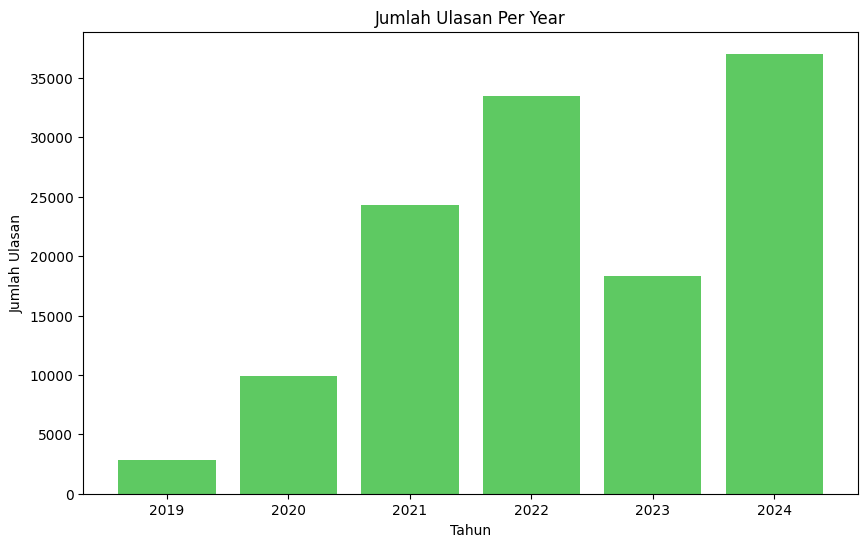

In [ ]:
review_counts_by_year = df.groupby('year')['content'].count()

# Sort by year
review_counts_by_year = review_counts_by_year.sort_index()

# Create the chart
plt.figure(figsize=(10, 6))
plt.bar(review_counts_by_year.index, review_counts_by_year.values, color='#5ec962')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Ulasan')
plt.title('Jumlah Ulasan Per Year')
plt.savefig('ulasan_per_tahun.png', dpi=1200, transparent=True, format='png')
plt.show()

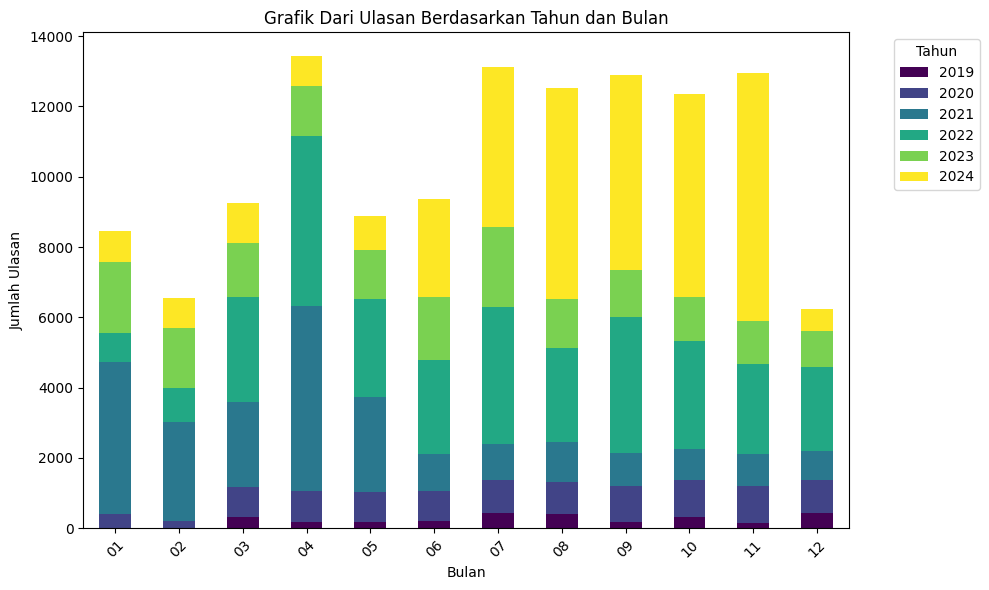

In [ ]:
# Group by year and month, and count 'content'
grouped = df.groupby(["year", "month"])["content"].count().unstack("year", fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Customize the plot
plt.title("Grafik Dari Ulasan Berdasarkan Tahun dan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Ulasan")
plt.xticks(rotation=45)
plt.legend(title="Tahun", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig('ulasan_per_tahun_bulan.png', dpi=1200, transparent=True, format='png')

# Show the plot
plt.show()

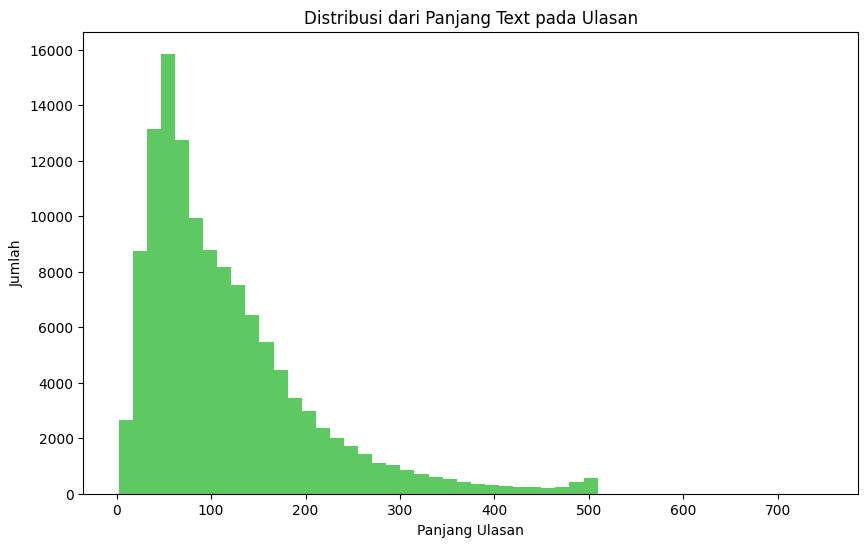

In [ ]:
string_lengths = df['content'].astype(str).str.len()
plt.figure(figsize=(10, 6))
plt.hist(string_lengths, bins=50, color='#5ec962')  # Adjust bins as needed
plt.xlabel('Panjang Ulasan')
plt.ylabel('Jumlah')
plt.title(f'Distribusi dari Panjang Text pada Ulasan')
plt.savefig('distribusi_panjang_ulasan.png', dpi=1200, transparent=True, format='png')
plt.show()

## Cleaning Text & Case Folding

In [ ]:
df['cleanText'] = df['content'].apply(cleaningText)
df['lowerText'] = df['cleanText'].apply(casefoldingText)
df.tail(3)

,content,score,at,appVersion,month,year,cleanText,lowerText
125997,sangat baik dan sangat membantu saya dalam ber...,5,2023-03-05 06:34:20,2.38.0,03,2023,sangat baik dan sangat membantu saya dalam ber...,sangat baik dan sangat membantu saya dalam ber...
125998,Mantap lebih mudah untuk trasfer egk perlu iku...,5,2023-08-26 07:35:05,2.45.1,08,2023,Mantap lebih mudah untuk trasfer egk perlu iku...,mantap lebih mudah untuk trasfer egk perlu iku...
125999,"Parah ga di kasih kartu harus pakek brimo, tap...",1,2023-08-30 17:27:02,2.46.0,08,2023,Parah ga di kasih kartu harus pakek brimo tapi...,parah ga di kasih kartu harus pakek brimo tapi...


## Normalization

In [ ]:
df['fix_typo'] = df['lowerText'].apply(lambda row: normalization(row, dic_singkatan))
df.tail(3)

,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo
125997,sangat baik dan sangat membantu saya dalam ber...,5,2023-03-05 06:34:20,2.38.0,03,2023,sangat baik dan sangat membantu saya dalam ber...,sangat baik dan sangat membantu saya dalam ber...,sangat baik dan sangat membantu saya dalam ber...
125998,Mantap lebih mudah untuk trasfer egk perlu iku...,5,2023-08-26 07:35:05,2.45.1,08,2023,Mantap lebih mudah untuk trasfer egk perlu iku...,mantap lebih mudah untuk trasfer egk perlu iku...,mantap lebih mudah untuk trasfer egk perlu iku...
125999,"Parah ga di kasih kartu harus pakek brimo, tap...",1,2023-08-30 17:27:02,2.46.0,08,2023,Parah ga di kasih kartu harus pakek brimo tapi...,parah ga di kasih kartu harus pakek brimo tapi...,parah ga di kasih kartu harus pakek brimo tapi...


## Tokenizing & Removal Stopwords

In [ ]:
df['tokenText'] = df['fix_typo'].apply(tokenizingText)
df['filterText'] = df['tokenText'].apply(filteringText)
df.head(3)

,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText
0,Hasil Update hanya mengutamakan tampilan saja ...,1,2021-01-13 22:05:02,2.1.0,01,2021,Hasil Update hanya mengutamakan tampilan saja ...,hasil update hanya mengutamakan tampilan saja ...,hasil update hanya mengutamakan tampilan saja ...,"[hasil, update, hanya, mengutamakan, tampilan,...","[hasil, update, mengutamakan, tampilan, fungsi..."
1,Aplikasi BRImo benar-benar mempermudah aktivit...,5,2024-12-02 13:48:19,2.74.0,12,2024,Aplikasi BRImo benar benar mempermudah aktivit...,aplikasi brimo benar benar mempermudah aktivit...,aplikasi brimo benar benar mempermudah aktivit...,"[aplikasi, brimo, benar, benar, mempermudah, a...","[aplikasi, brimo, mempermudah, aktivitas, perb..."
2,"Kenapa brimo saya tidak bisa di buka, padahal ...",3,2024-11-29 09:50:22,2.73.0,11,2024,Kenapa brimo saya tidak bisa di buka padahal u...,kenapa brimo saya tidak bisa di buka padahal u...,kenapa brimo saya tidak bisa di buka padahal u...,"[kenapa, brimo, saya, tidak, bisa, di, buka, p...","[brimo, buka, username, pasword, udah, gagal, ..."


In [ ]:
df['text'] = df['filterText'].apply(toSentence)
df.head(3)

,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText,text
0,Hasil Update hanya mengutamakan tampilan saja ...,1,2021-01-13 22:05:02,2.1.0,01,2021,Hasil Update hanya mengutamakan tampilan saja ...,hasil update hanya mengutamakan tampilan saja ...,hasil update hanya mengutamakan tampilan saja ...,"[hasil, update, hanya, mengutamakan, tampilan,...","[hasil, update, mengutamakan, tampilan, fungsi...",hasil update mengutamakan tampilan fungsinya r...
1,Aplikasi BRImo benar-benar mempermudah aktivit...,5,2024-12-02 13:48:19,2.74.0,12,2024,Aplikasi BRImo benar benar mempermudah aktivit...,aplikasi brimo benar benar mempermudah aktivit...,aplikasi brimo benar benar mempermudah aktivit...,"[aplikasi, brimo, benar, benar, mempermudah, a...","[aplikasi, brimo, mempermudah, aktivitas, perb...",aplikasi brimo mempermudah aktivitas perbankan...
2,"Kenapa brimo saya tidak bisa di buka, padahal ...",3,2024-11-29 09:50:22,2.73.0,11,2024,Kenapa brimo saya tidak bisa di buka padahal u...,kenapa brimo saya tidak bisa di buka padahal u...,kenapa brimo saya tidak bisa di buka padahal u...,"[kenapa, brimo, saya, tidak, bisa, di, buka, p...","[brimo, buka, username, pasword, udah, gagal, ...",brimo buka username pasword udah gagal usernam...


## Stemming

We Slicing Dataframe by year for not time comsuming the stemming process

In [ ]:
# slicing dta berdasarkan tahun
df_2022 = df[df['year'] == '2022']
df_2023 = df[df['year'] == '2023']
df_2024 = df[df['year'] == '2024']

In [ ]:
print(f'shape 2022: {df_2022.shape}')
print(f'shape 2023: {df_2023.shape}')
print(f'shape 2024: {df_2024.shape}')
print(f'total rows 2022-2024: {df_2022.shape[0] + df_2023.shape[0] + df_2024.shape[0]}')

shape 2022: (33493, 12)
shape 2023: (18345, 12)
shape 2024: (37036, 12)
total rows 2022-2024: 88874


In [ ]:
# membuat sample dari dataframe per tahun
df_2022_sample = df_2022.sample(frac=0.118)
df_2023_sample = df_2023.sample(frac=0.118)
df_2024_sample = df_2024.sample(frac=0.118)

In [ ]:
print(f'shape 2022_sample: {df_2022_sample.shape}')
print(f'shape 2023_sample: {df_2023_sample.shape}')
print(f'shape 2024_sample: {df_2024_sample.shape}')
print(f'total rows 2022-2024_sample: {df_2022_sample.shape[0] + df_2023_sample.shape[0] + df_2024_sample.shape[0]}')

shape 2022_sample: (3952, 12)
shape 2023_sample: (2165, 12)
shape 2024_sample: (4370, 12)
total rows 2022-2024_sample: 10487


In [ ]:
df_2022_sample['stemmingText'] = df_2022_sample['text'].apply(stemmingText)

In [ ]:
df_2023_sample['stemmingText'] = df_2023_sample['text'].apply(stemmingText)

In [ ]:
df_2024_sample['stemmingText'] = df_2024_sample['text'].apply(stemmingText)

### Save Result

In [ ]:
df_2022_2024 = pd.concat([df_2022, df_2023, df_2024])

In [ ]:
df_2022_2024_sample =pd.concat([df_2022_sample, df_2023_sample, df_2024_sample])

In [ ]:
df_2022_2024_sample = df_2022_2024_sample.reset_index()

In [ ]:
df_2022_2024_sample = df_2022_2024_sample.drop(columns='index')

In [ ]:
df_2022_2024_sample.head(3)

,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText,text,stemmingText
0,Kenapa yah setelah update fitur tarik tunai ti...,2,2022-11-28 04:46:01,2.32.0,11,2022,Kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,"[kenapa, yah, setelah, update, fitur, tarik, t...","[yah, update, fitur, tarik, tunai, pakai, bank...",yah update fitur tarik tunai pakai bank bri ka...,yah update fitur tarik tunai pakai bank bri ka...
1,Sudah gk keluar keluar lagi. Tapi gagal saat t...,2,2022-11-24 07:52:25,2.32.0,11,2022,Sudah gk keluar keluar lagi Tapi gagal sat tra...,sudah gk keluar keluar lagi tapi gagal sat tra...,sudah enggak keluar keluar lagi tapi gagal sat...,"[sudah, enggak, keluar, keluar, lagi, tapi, ga...","[gagal, sat, transfer]",gagal sat transfer,gagal sat transfer
2,"Pajaknya agak tinggi, agak kurang itu aja🙏, ka...",4,2022-03-27 05:52:58,2.18.0,03,2022,Pajaknya agak tingi agak kurang itu aja kalau ...,pajaknya agak tingi agak kurang itu aja kalau ...,pajaknya agak tingi agak kurang itu aja kalau ...,"[pajaknya, agak, tingi, agak, kurang, itu, aja...","[pajaknya, tingi, aja, rendahin, dikit]",pajaknya tingi aja rendahin dikit,pajak tingi aja rendahin dikit


In [ ]:
df_2022_2024.to_csv('review_brimo_reclean_22_24.csv', index=False)
shutil.copy('/content/review_brimo_reclean_22_24.csv', '/content/drive/My Drive/TA/review_brimo_reclean_22_24.csv')
df_2022_2024_sample.to_csv('review_brimo_reclean_22_24_sample.csv', index=False)
shutil.copy('/content/review_brimo_reclean_22_24_sample.csv', '/content/drive/My Drive/TA/review_brimo_reclean_22_24_sample.csv')

'/content/drive/My Drive/TA/review_brimo_reclean_22_24_sample.csv'

## Data Labeling

In [ ]:
df = pd.read_csv('/content/drive/My Drive/TA/review_brimo_reclean_22_24_sample.csv')
df.head(3)

,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText,text,stemmingText
0,Kenapa yah setelah update fitur tarik tunai ti...,2,2022-11-28 04:46:01,2.32.0,11,2022,Kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,"['kenapa', 'yah', 'setelah', 'update', 'fitur'...","['yah', 'update', 'fitur', 'tarik', 'tunai', '...",yah update fitur tarik tunai pakai bank bri ka...,yah update fitur tarik tunai pakai bank bri ka...
1,Sudah gk keluar keluar lagi. Tapi gagal saat t...,2,2022-11-24 07:52:25,2.32.0,11,2022,Sudah gk keluar keluar lagi Tapi gagal sat tra...,sudah gk keluar keluar lagi tapi gagal sat tra...,sudah enggak keluar keluar lagi tapi gagal sat...,"['sudah', 'enggak', 'keluar', 'keluar', 'lagi'...","['gagal', 'sat', 'transfer']",gagal sat transfer,gagal sat transfer
2,"Pajaknya agak tinggi, agak kurang itu aja🙏, ka...",4,2022-03-27 05:52:58,2.18.0,3,2022,Pajaknya agak tingi agak kurang itu aja kalau ...,pajaknya agak tingi agak kurang itu aja kalau ...,pajaknya agak tingi agak kurang itu aja kalau ...,"['pajaknya', 'agak', 'tingi', 'agak', 'kurang'...","['pajaknya', 'tingi', 'aja', 'rendahin', 'dikit']",pajaknya tingi aja rendahin dikit,pajak tingi aja rendahin dikit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10487 entries, 0 to 10486
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       10487 non-null  object
 1   score         10487 non-null  int64 
 2   at            10487 non-null  object
 3   appVersion    10487 non-null  object
 4   month         10487 non-null  int64 
 5   year          10487 non-null  int64 
 6   cleanText     10487 non-null  object
 7   lowerText     10487 non-null  object
 8   fix_typo      10487 non-null  object
 9   tokenText     10487 non-null  object
 10  filterText    10487 non-null  object
 11  text          10479 non-null  object
 12  stemmingText  10479 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.0+ MB


In [ ]:
df = df.dropna(subset=['stemmingText'], axis=0)

In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(columns=['index', 'level_0'])
df.head(3)

,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText,text,stemmingText
0,Kenapa yah setelah update fitur tarik tunai ti...,2,2022-11-28 04:46:01,2.32.0,11,2022,Kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,"['kenapa', 'yah', 'setelah', 'update', 'fitur'...","['yah', 'update', 'fitur', 'tarik', 'tunai', '...",yah update fitur tarik tunai pakai bank bri ka...,yah update fitur tarik tunai pakai bank bri ka...
1,Sudah gk keluar keluar lagi. Tapi gagal saat t...,2,2022-11-24 07:52:25,2.32.0,11,2022,Sudah gk keluar keluar lagi Tapi gagal sat tra...,sudah gk keluar keluar lagi tapi gagal sat tra...,sudah enggak keluar keluar lagi tapi gagal sat...,"['sudah', 'enggak', 'keluar', 'keluar', 'lagi'...","['gagal', 'sat', 'transfer']",gagal sat transfer,gagal sat transfer
2,"Pajaknya agak tinggi, agak kurang itu aja🙏, ka...",4,2022-03-27 05:52:58,2.18.0,3,2022,Pajaknya agak tingi agak kurang itu aja kalau ...,pajaknya agak tingi agak kurang itu aja kalau ...,pajaknya agak tingi agak kurang itu aja kalau ...,"['pajaknya', 'agak', 'tingi', 'agak', 'kurang'...","['pajaknya', 'tingi', 'aja', 'rendahin', 'dikit']",pajaknya tingi aja rendahin dikit,pajak tingi aja rendahin dikit


In [ ]:
df.isnull().sum()

,0
content,0
score,0
at,0
appVersion,0
month,0
year,0
cleanText,0
lowerText,0
fix_typo,0
tokenText,0


### Aspek Labeling

In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
system_keyword = pd.DataFrame()
service_keyword = pd.DataFrame()
comfort_keyword = pd.DataFrame()

with open('/content/drive/MyDrive/TA/keyword.json', 'r') as json_data:
    keyword_dict = json.load(json_data)
    system_keyword['system'] = pd.DataFrame(keyword_dict['system'])
    service_keyword['service'] = pd.DataFrame(keyword_dict['service'])
    comfort_keyword['comfort'] = pd.DataFrame(keyword_dict['comfort'])

In [ ]:
system_keyword_list = system_keyword['system'].values.tolist()
service_keyword_list = service_keyword['service'].values.tolist()
comfort_keyword_list = comfort_keyword['comfort'].values.tolist()

print(f'kerword system: {system_keyword_list}')
print(f'kerword service: {service_keyword_list}')
print(f'kerword comfort: {comfort_keyword_list}')

kerword system: ['update', 'otp', 'aplikasi', 'login', 'online', 'handphone', 'akses', 'sinyal', 'kode', 'foto', 'verifikasi', 'petunjuk', 'notifikasi', 'username', 'password', 'atm', 'daftar', 'pin', 'canggih', 'fitur', 'koneksi', 'internet', 'uninstall', 'install', 'wifi', 'masuk', 'nomor', 'sistem', 'kendala', 'wajah', 'off', 'link', 'sms', 'kirim', 'kuota', 'menu', 'referral', 'loading', 'iklan', 'mobile', 'email', 'perangkat', 'registrasi', 'paylater', 'top up', 'ewallet', 'video', 'pakai', 'mbanking', 'blokir', 'data', 'firmware', 'background', 'finger print', 'out', 'download', 'upload', 'ktp', 'trouble', 'kamera', 'keamanan', 'aman', 'compatible', 'brimo']
kerword service: ['briguna', 'transaksi', 'call center', 'bank', 'aktivitas', 'professional', 'bayar', 'transfer', 'saldo', 'potong', 'tarik', 'tunai', 'setor', 'uang', 'admin', 'kredit', 'belanja', 'pelayanan', 'urus', 'proses', 'uang', 'aduan', 'solusi', 'promosi', 'pengeluaran', 'pajak', 'respon', 'autodebet', 'jatuh', 'te

In [ ]:
keyword_list = system_keyword_list + service_keyword_list + comfort_keyword_list
# Combine document texts and keywords for TF-IDF processing
corpus = keyword_list + df['stemmingText'].tolist()

print(f'corpus: {corpus}')

corpus: ['update', 'otp', 'aplikasi', 'login', 'online', 'handphone', 'akses', 'sinyal', 'kode', 'foto', 'verifikasi', 'petunjuk', 'notifikasi', 'username', 'password', 'atm', 'daftar', 'pin', 'canggih', 'fitur', 'koneksi', 'internet', 'uninstall', 'install', 'wifi', 'masuk', 'nomor', 'sistem', 'kendala', 'wajah', 'off', 'link', 'sms', 'kirim', 'kuota', 'menu', 'referral', 'loading', 'iklan', 'mobile', 'email', 'perangkat', 'registrasi', 'paylater', 'top up', 'ewallet', 'video', 'pakai', 'mbanking', 'blokir', 'data', 'firmware', 'background', 'finger print', 'out', 'download', 'upload', 'ktp', 'trouble', 'kamera', 'keamanan', 'aman', 'compatible', 'brimo', 'briguna', 'transaksi', 'call center', 'bank', 'aktivitas', 'professional', 'bayar', 'transfer', 'saldo', 'potong', 'tarik', 'tunai', 'setor', 'uang', 'admin', 'kredit', 'belanja', 'pelayanan', 'urus', 'proses', 'uang', 'aduan', 'solusi', 'promosi', 'pengeluaran', 'pajak', 'respon', 'autodebet', 'jatuh', 'tempo', 'nasabah', 'cs', 'ta

In [ ]:
# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()
# Compute TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Split keyword vectors and document vectors
system_vector = tfidf_matrix[:len(system_keyword_list)]
service_vector = tfidf_matrix[len(system_keyword_list):len(system_keyword_list) + len(service_keyword_list)]
comfort_vector = tfidf_matrix[len(system_keyword_list) + len(service_keyword_list): len(system_keyword_list) + len(service_keyword_list) + len(comfort_keyword_list)]
# keyword_vectors = tfidf_matrix[:len(keyword_list)]
document_vectors = tfidf_matrix[len(keyword_list):]

In [ ]:
# Compute similarities and label documents
results = []
for idx, doc_vector in enumerate(document_vectors):
    # Compute cosine similarity with each keyword category
    system_similarity = cosine_similarity(system_vector, doc_vector)
    service_similarity = cosine_similarity(service_vector, doc_vector)
    comfort_similarity = cosine_similarity(comfort_vector, doc_vector)

    # Aggregate scores for each category (e.g., mean similarity)
    avg_system_similarity = system_similarity.mean()
    avg_service_similarity = service_similarity.mean()
    avg_comfort_similarity = comfort_similarity.mean()

    # Determine the category with the highest similarity
    category_scores = {
        "system": avg_system_similarity,
        "service": avg_service_similarity,
        "comfort": avg_comfort_similarity,
    }
    best_category = max(category_scores, key=category_scores.get)

    # Store results
    results.append({
        "text2": df.loc[idx, "stemmingText"],
        "category": best_category,
        "scores": category_scores,
    })

# Convert results to a DataFrame for easier analysis
result_df = pd.DataFrame(results)
result_df.head()

,text2,category,scores
0,yah update fitur tarik tunai pakai bank bri ka...,service,"{'system': 0.015471003463142827, 'service': 0...."
1,gagal sat transfer,service,"{'system': 0.0, 'service': 0.01254753903229114..."
2,pajak tingi aja rendahin dikit,service,"{'system': 0.0, 'service': 0.00981735782104503..."
3,tampilanya tarik mudah paham bantu,comfort,"{'system': 0.0, 'service': 0.01410265870781582..."
4,masuk g koneksi internet g gmn kuota beli,system,"{'system': 0.022970044298218806, 'service': 0...."


In [ ]:
result_df['scores'] = result_df['scores'].apply(lambda x: str(x))
def split_similarities(row):
    similarities_str = row['scores']  # Assuming 'similarities' column contains the string
    try:
        similarities_dict = eval(similarities_str) # Safely evaluate the string as a dictionary
        system_score = similarities_dict.get('system', 0) # Handle missing keys with default value 0
        service_score = similarities_dict.get('service', 0)
        comfort_score = similarities_dict.get('comfort', 0)

        return pd.Series({'system': 1 if system_score > 0 else 0,
                          'service': 1 if service_score > 0 else 0,
                          'comfort': 1 if comfort_score > 0 else 0})

    except (SyntaxError, NameError, TypeError) as e:
        print(f"Error processing row: {row}, Error: {e}")
        return pd.Series({'system': 0, 'service': 0, 'comfort': 0})  # Return default values on error

# Apply the function to create the new columns
new_columns = result_df.apply(split_similarities, axis=1)
result_df = pd.concat([result_df, new_columns], axis=1)

# Now result_df has 'system', 'service', and 'comfort' columns
result_df.head()

,text2,category,scores,system,service,comfort
0,yah update fitur tarik tunai pakai bank bri ka...,service,"{'system': 0.015471003463142827, 'service': 0....",1,1,1
1,gagal sat transfer,service,"{'system': 0.0, 'service': 0.01254753903229114...",0,1,0
2,pajak tingi aja rendahin dikit,service,"{'system': 0.0, 'service': 0.00981735782104503...",0,1,0
3,tampilanya tarik mudah paham bantu,comfort,"{'system': 0.0, 'service': 0.01410265870781582...",0,1,1
4,masuk g koneksi internet g gmn kuota beli,system,"{'system': 0.022970044298218806, 'service': 0....",1,1,0


In [ ]:
# Filter data by save only data with aspek
result_df = result_df[(result_df['system'] > 0) | (result_df['service'] > 0) | (result_df['comfort'] > 0)]
result_df.head()

,text2,category,scores,system,service,comfort
0,yah update fitur tarik tunai pakai bank bri ka...,service,"{'system': 0.015471003463142827, 'service': 0....",1,1,1
1,gagal sat transfer,service,"{'system': 0.0, 'service': 0.01254753903229114...",0,1,0
2,pajak tingi aja rendahin dikit,service,"{'system': 0.0, 'service': 0.00981735782104503...",0,1,0
3,tampilanya tarik mudah paham bantu,comfort,"{'system': 0.0, 'service': 0.01410265870781582...",0,1,1
4,masuk g koneksi internet g gmn kuota beli,system,"{'system': 0.022970044298218806, 'service': 0....",1,1,0


Visualize Result

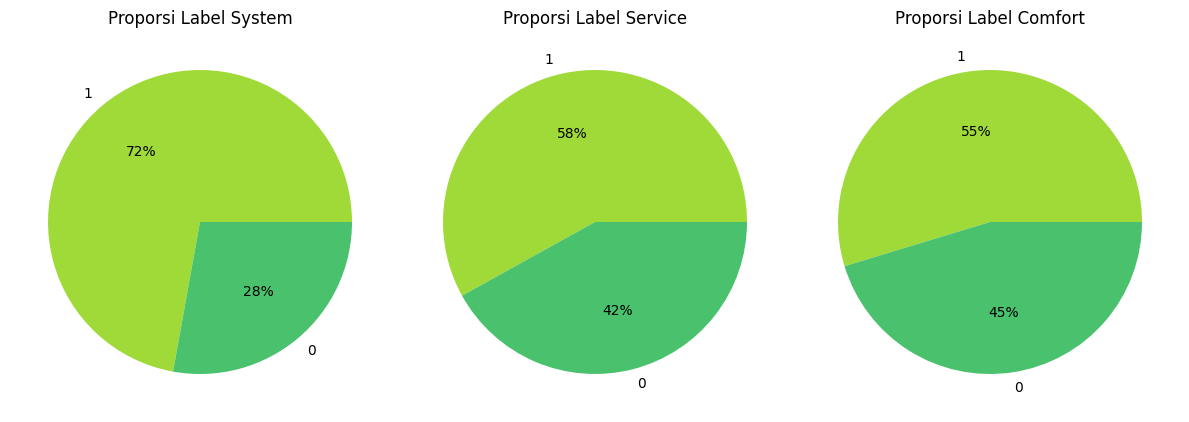

In [ ]:
palette_color = sns.color_palette('viridis_r')
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.pie(result_df['system'].value_counts(), labels=result_df['system'].value_counts().index, autopct='%.0f%%', colors=palette_color)
plt.title('Proporsi Label System')

plt.subplot(1, 3, 2)
plt.pie(result_df['service'].value_counts(), labels=result_df['service'].value_counts().index, autopct='%.0f%%', colors=palette_color)
plt.title('Proporsi Label Service')

plt.subplot(1, 3, 3)
plt.pie(result_df['comfort'].value_counts(), labels=result_df['comfort'].value_counts().index, autopct='%.0f%%', colors=palette_color)
plt.title('Proporsi Label Comfort')

plt.tight_layout()
plt.savefig('aspect_label_distribution.png', dpi=1200, transparent=True, format='png')
plt.show()

In [ ]:
df = pd.concat([df, result_df], axis=1)
df.head(2)

,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText,text,stemmingText,text2,category,scores,system,service,comfort
0,Kenapa yah setelah update fitur tarik tunai ti...,2,2022-11-28 04:46:01,2.32.0,11,2022,Kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,kenapa yah setelah update fitur tarik tunai ti...,"['kenapa', 'yah', 'setelah', 'update', 'fitur'...","['yah', 'update', 'fitur', 'tarik', 'tunai', '...",yah update fitur tarik tunai pakai bank bri ka...,yah update fitur tarik tunai pakai bank bri ka...,yah update fitur tarik tunai pakai bank bri ka...,service,"{'system': 0.015471003463142827, 'service': 0....",1.0,1.0,1.0
1,Sudah gk keluar keluar lagi. Tapi gagal saat t...,2,2022-11-24 07:52:25,2.32.0,11,2022,Sudah gk keluar keluar lagi Tapi gagal sat tra...,sudah gk keluar keluar lagi tapi gagal sat tra...,sudah enggak keluar keluar lagi tapi gagal sat...,"['sudah', 'enggak', 'keluar', 'keluar', 'lagi'...","['gagal', 'sat', 'transfer']",gagal sat transfer,gagal sat transfer,gagal sat transfer,service,"{'system': 0.0, 'service': 0.01254753903229114...",0.0,1.0,0.0


In [ ]:
df = df.drop(columns=['text2'])

In [ ]:
name = 'review_brimo_22_24_sample_aspect_label_cosine'
df.to_csv(f'{name}.csv', index=False)
shutil.copy(f'{name}.csv', f"/content/drive/My Drive/TA/{name}.csv")

'/content/drive/My Drive/TA/review_brimo_22_24_sample_aspect_label_cosine.csv'

### Sentimen Labeling

In [ ]:
df_2022_2024_sample = pd.read_csv('/content/drive/My Drive/TA/review_brimo_22_24_sample_aspect_label_cosine.csv')
df_2022_2024_sample

,index,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText,text,stemmingText,category,scores,system,service,comfort
0,13521,Saya baru buat rekening kemarin trus download ...,2,2022-07-13 08:41:51,2.23.1,7,2022,Saya baru buat rekening kemarin trus download ...,saya baru buat rekening kemarin trus download ...,saya baru buat rekening kemarin trus download ...,"['saya', 'baru', 'buat', 'rekening', 'kemarin'...","['rekening', 'kemarin', 'trus', 'download', 'a...",rekening kemarin trus download ap pas isi data...,rekening kemarin trus download ap pas isi data...,system,"{'system': 0.012142765644722657, 'service': 0....",1.0,1.0,1.0
1,82877,"Kenapa selalu gagal pas kirim rekaman vidio, p...",2,2022-06-08 08:39:56,2.21.0,6,2022,Kenapa selalu gagal pas kirim rekaman vidio pa...,kenapa selalu gagal pas kirim rekaman vidio pa...,kenapa selalu gagal pas kirim rekaman vidio pa...,"['kenapa', 'selalu', 'gagal', 'pas', 'kirim', ...","['gagal', 'pas', 'kirim', 'rekaman', 'vidio', ...",gagal pas kirim rekaman vidio jaringanya bagus,gagal pas kirim rekam vidio jaringanya bagus,system,"{'system': 0.00583988885114533, 'service': 0.0...",1.0,0.0,0.0
2,19381,"Susah banget daftar brimonya, pas perekam vidi...",2,2022-07-11 18:16:16,2.23.1,7,2022,Susah banget daftar brimonya pas perekam vidio...,susah banget daftar brimonya pas perekam vidio...,susah banget daftar brimonya pas perekam vidio...,"['susah', 'banget', 'daftar', 'brimonya', 'pas...","['susah', 'banget', 'daftar', 'brimonya', 'pas...",susah banget daftar brimonya pas perekam vidio...,susah banget daftar brimonya pas rekam vidio k...,system,"{'system': 0.022140101947715395, 'service': 0....",1.0,0.0,1.0
3,115783,Kalo bisa diprint lebih mantap lagi brimo..,3,2022-11-01 12:28:52,2.30.0,11,2022,Kalo bisa diprint lebih mantap lagi brimo,kalo bisa diprint lebih mantap lagi brimo,kalo bisa diprint lebih mantap lagi brimo,"['kalo', 'bisa', 'diprint', 'lebih', 'mantap',...","['kalo', 'diprint', 'mantap', 'brimo']",kalo diprint mantap brimo,kalo diprint mantap brimo,system,"{'system': 0.003469194610882888, 'service': 0....",1.0,0.0,0.0
4,7725,"Susah bgt buat bikin akun mbanking, sering ter...",1,2022-06-08 11:48:16,2.21.0,6,2022,Susah bgt buat bikin akun mbanking sering terj...,susah bgt buat bikin akun mbanking sering terj...,susah bgt buat bikin akun mbanking sering terj...,"['susah', 'bgt', 'buat', 'bikin', 'akun', 'mba...","['susah', 'bgt', 'bikin', 'akun', 'mbanking', ...",susah bgt bikin akun mbanking error vertifikas...,susah bgt bikin akun mbanking error vertifikas...,system,"{'system': 0.00968073144232891, 'service': 0.0...",1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,3024,"aplikasi bodoh dan ribet, data udah sesuai sim...",1,2024-08-05 09:19:54,2.64.0,8,2024,aplikasi bodoh dan ribet data udah sesuai simc...,aplikasi bodoh dan ribet data udah sesuai simc...,aplikasi bodoh dan ribet data udah sesuai simc...,"['aplikasi', 'bodoh', 'dan', 'ribet', 'data', ...","['aplikasi', 'bodoh', 'ribet', 'data', 'udah',...",aplikasi bodoh ribet data udah sesuai simcard ...,aplikasi bodoh ribet data udah sesuai simcard ...,comfort,"{'system': 0.009045435463281643, 'service': 0....",1.0,1.0,1.0
8883,37512,Sangat membantu sekali dan memudahkan segala u...,4,2024-08-18 09:38:18,2.62.0,8,2024,Sangat membantu sekali dan memudahkan segala u...,sangat membantu sekali dan memudahkan segala u...,sangat membantu sekali dan memudahkan segala u...,"['sangat', 'membantu', 'sekali', 'dan', 'memud...","['membantu', 'memudahkan', 'urusan']",membantu memudahkan urusan,bantu mudah urus,comfort,"{'system': 0.0, 'service': 0.02628215689936702...",0.0,1.0,1.0
8884,19385,(saran)jangan terlalu sering update.masak baru...,3,2024-09-15 03:14:32,2.68.0,9,2024,saran jangan terlalu sering update masak baru ...,saran jangan terlalu sering update masak baru ...,saran jangan terlalu sering upadaate masak bar...,"['saran', 'jangan', 'terlalu', 'seri

Visualize Data Score

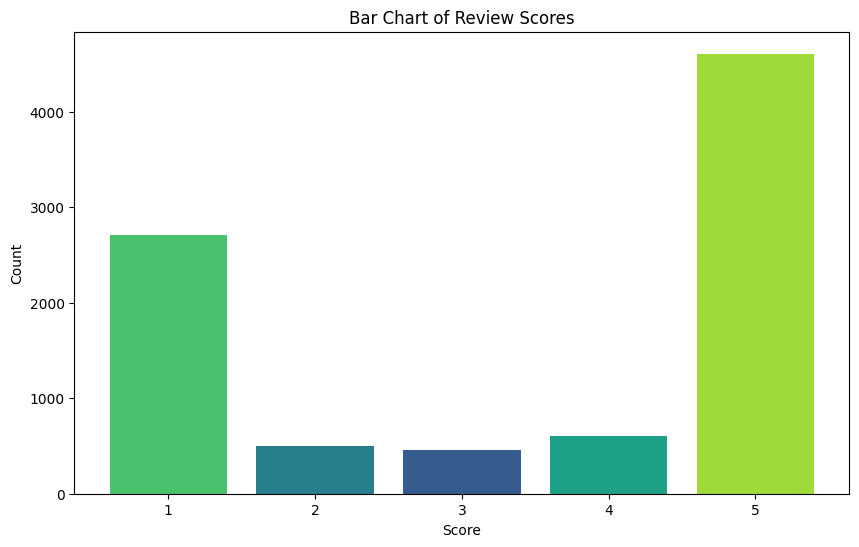

In [ ]:
palette_color = sns.color_palette('viridis_r')
plt.figure(figsize=(10, 6))
plt.bar(df_2022_2024_sample['score'].value_counts().index, df_2022_2024_sample['score'].value_counts().values, color=palette_color)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Bar Chart of Review Scores')
plt.show()

Labeling Sentimen By Score

In [ ]:
df_2022_2024_sample['sentiment_by_score'] = 0
df_2022_2024_sample.loc[df_2022_2024_sample['score'] >= 4, 'sentiment_by_score'] = 1  # Score 5 or 4 gets sentiment_by_score 1
df_2022_2024_sample.loc[df_2022_2024_sample['score'] <= 3, 'sentiment_by_score'] = 0  # Score 1 or 3 gets sentiment_by_score 0

Visualize Result

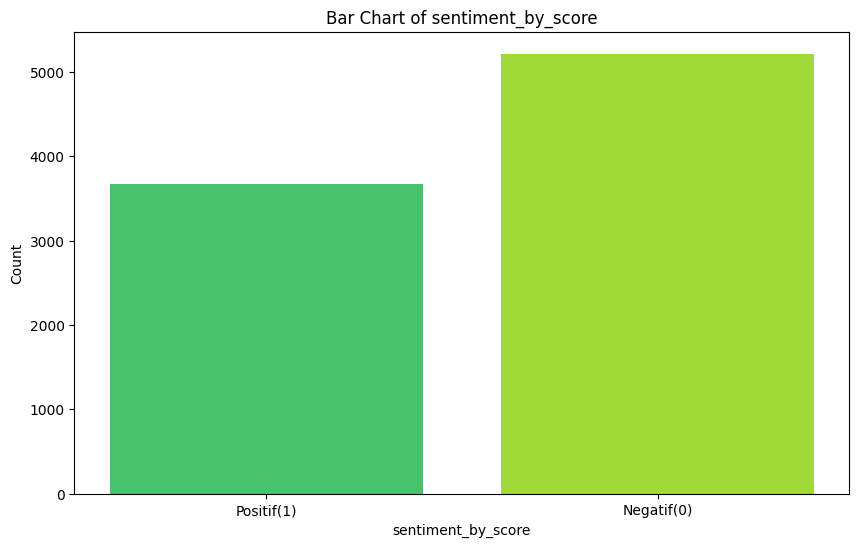

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_2022_2024_sample['sentiment_by_score'].value_counts().index, df_2022_2024_sample['sentiment_by_score'].value_counts().values, color=palette_color)
plt.xlabel('sentiment_by_score')
plt.ylabel('Count')
plt.title('Bar Chart of sentiment_by_score')
plt.xticks(df_2022_2024_sample['sentiment_by_score'].unique(), ['Positif(1)', 'Negatif(0)'])
plt.show()

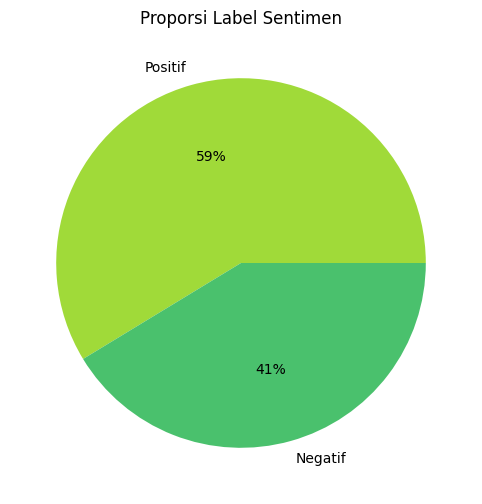

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(df_2022_2024_sample['sentiment_by_score'].value_counts(), labels=['Positif', 'Negatif'], autopct='%.0f%%', colors=palette_color)
plt.title('Proporsi Label Sentimen')
plt.savefig('sentiment_label_proporsi.png', dpi=1200, transparent=True, format='png')
plt.show()

# Klasifikasi Aspek

Import library

In [ ]:
!pip install keras-tuner --upgrade
import keras_tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import tensorflow as tf
import keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout, TextVectorization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import text, sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
%load_ext tensorboard

## Function Utils CNN

In [ ]:
def plot_confusion_matrix_aspect(y_true, x_val, model, model_name):
  y_pred = model.predict(x_val, batch_size = 32)
  y_pred = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_true, axis=1)
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['System', 'Service', 'Comfort'],
              yticklabels=['System', 'Service', 'Comfort'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'Confusion Matrix of {model_name}')
  plt.savefig(f'confusion_matrix_{model_name}_aspect_cosine.png', transparent=True, dpi=1200, format='png',)
  plt.show()

def plot_roc_auc_aspect(y_true, x_val, model, model_name):
  y_pred = model.predict(x_val, batch_size = 32)
  y_pred_probs =  np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1, keepdims=True)
  classes = [0, 1, 2]
  y_true_bin = label_binarize(np.argmax(y_true.values, axis=1), classes=classes)
  n_classes = y_true_bin.shape[1]
  roc_auc_score(y_true_bin, y_pred_probs, multi_class='ovo', average='macro')
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_probs.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Plot ROC curves for each class and the micro-average
  plt.figure()
  lw = 2
  plt.plot(fpr[0], tpr[0], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve of Model {model_name}')
  plt.legend(loc="lower right")
  plt.savefig(f'roc_auc_curve_{model_name}.png', transparent=True, dpi=1200, format='png',)
  plt.show()

In [ ]:
def plot_string_lengths(df, column_name):
  """Plots the length of each string in a specified column of a DataFrame.

  Args:
      df: The input DataFrame.
      column_name: The name of the column containing the strings.
  """
  string_lengths = df[column_name].astype(str).str.len()
  plt.figure(figsize=(10, 6))
  plt.hist(string_lengths, bins=50)  # Adjust bins as needed
  plt.xlabel('String Length')
  plt.ylabel('Frequency')
  plt.title(f'Distribution of String Lengths in "{column_name}"')
  plt.show()

In [ ]:
def plot_learning_curve(history_train, model_name):
  plt.plot(history_train.history['accuracy'])
  plt.plot(history_train.history['val_accuracy'])
  plt.title(f'Learning Curve of Model {model_name}')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.savefig(f'learning_curve_{model_name}.png', transparent=True, dpi=1200, format='png',)
  plt.show()

def plot_learning_loss(history_train, model_name):
  plt.plot(history_train.history['loss'])
  plt.plot(history_train.history['val_loss'])
  plt.title(f'Model {model_name} loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.savefig(f'loss_curve_{model_name}.png', transparent=True, dpi=1200, format='png',)
  plt.show()

def plot_data(dataframe, column_name):
  dataframe[column_name].value_counts().plot(kind='bar')

def save_log_search(source_dir, destination_dir):
  try:
    copy_tree(source_dir, destination_dir)
    print(f"Successfully copied '{source_dir}' to '{destination_dir}'")
  except Exception as e:
    print(f"Error copying directory: {e}")

def plot_keras_model(model, model_name):
  plot_model(model, to_file=f'{model_name}.png', show_shapes=True, show_layer_names=True)

def classification_report_aspect(X, y, model, model_name):
  pred = model.predict(X, batch_size = 32)
  pred = np.argmax(pred, axis=1)
  y = np.argmax(y, axis=1)
  report = classification_report(y, pred, target_names=['system', 'service', 'comfort'])
  with open(f'classification_report_{model_name}.txt', 'w') as f:
    f.write(report)
  return report

## Read and Split Dataset

In [ ]:
file_name = 'review_brimo_22_24_sample_aspect_label_cosine'
file_path = f'/content/drive/MyDrive/TA/{file_name}.csv'

df = pd.read_csv(file_path)
df.isnull().sum()

,0
content,0
score,0
at,0
appVersion,0
month,0
year,0
cleanText,0
lowerText,0
fix_typo,0
tokenText,0


In [ ]:
df_new = df[['stemmingText', 'system', 'service', 'comfort']].dropna(subset=['system', 'service', 'comfort'])
df_new.head()

,stemmingText,system,service,comfort
0,yah update fitur tarik tunai pakai bank bri ka...,1.0,1.0,1.0
1,gagal sat transfer,0.0,1.0,0.0
2,pajak tingi aja rendahin dikit,0.0,1.0,0.0
3,tampilanya tarik mudah paham bantu,0.0,1.0,1.0
4,masuk g koneksi internet g gmn kuota beli,1.0,1.0,0.0


In [ ]:
y = df_new[['system', 'service', 'comfort']]
x = df_new['stemmingText']

In [ ]:
tf.keras.utils.to_categorical(
    y, num_classes=3
)

array([[[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       ...,

       [[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (7905,)
Shape of x_val: (988,)
Shape of x_test: (989,)


In [ ]:
print("Shape of y_trian", y_train.shape)
print("Shape of y_val", y_val.shape)
print("Shape of y_test", y_test.shape)

Shape of y_trian (7905, 3)
Shape of y_val (988, 3)
Shape of y_test (989, 3)


## TF-IDF

In [ ]:
max_token = 10000
tfid_vec_layer = TextVectorization(
    max_tokens = max_token,
    standardize = 'lower_and_strip_punctuation',
    split = 'whitespace',
    output_mode = 'tf_idf',
    pad_to_max_tokens = False
)

In [ ]:
tfid_vec_layer.adapt(x_train)

In [ ]:
x_train_tfidf = tfid_vec_layer(x_train)
x_val_tfidf = tfid_vec_layer(x_val)
x_test_tfidf = tfid_vec_layer(x_test)

In [ ]:
x_train_tfidf[:,:10]

<tf.Tensor: shape=(7905, 10), dtype=float32, numpy=
array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.6461498, 1.5510675, ..., 0.       , 0.       ,
        5.052505 ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        2.5262525],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.6461498, 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)>

In [ ]:
print(f'vocabulary on tfid :{tfid_vec_layer.get_vocabulary()}')

vocabulary on tfid :['[UNK]', 'brimo', 'mudah', 'aplikasi', 'transaksi', 'bantu', 'daftar', 'gagal', 'bagus', 'bri', 'masuk', 'login', 'aja', 'udah', 'cepat', 'tolong', 'kali', 'bank', 'susah', 'baik', 'buka', 'saldo', 'transfer', 'banget', 'atm', 'update', 'pakai', 'sat', 'handphone', 'akun', 'verifikasi', 'uang', 'mohon', 'ribet', 'pasword', 'pas', 'lancar', 'coba', 'bikin', 'data', 'apk', 'rekening', 'jaring', 'sulit', 'kasih', 'pake', 'kartu', 'bayar', 'mantap', 'internet', 'error', 'wajah', 'ulang', 'video', 'aman', 'proses', 'sms', 'blokir', 'salah', 'rekam', 'koneksi', 'nomor', 'gimana', 'nasabah', 'terimakasih', 'kecewa', 'fitur', 'bintang', 'terima', 'kode', 'kirim', 'layan', 'kalo', 'username', 'ganti', 'moga', 'pulsa', 'sesuai', 'suruh', 'potong', 'email', 'kendala', 'mengunakan', 'foto', 'praktis', 'bener', 'sinyal', 'notifikasi', 'wifi', 'langsung', 'tingkat', 'gampang', 'ktp', 'tunai', 'tetep', 'menu', 'sistem', 'tarik', 'ngak', 'isi', 'online', 'lupa', 'hasil', 'muncul',

In [ ]:
vocab_size_tfidf = tfid_vec_layer.vocabulary_size()
print(f'vocabulary size on tfid :{vocab_size_tfidf}')

vocabulary size on tfid :5420


## Glove

### Int Index Text

In [ ]:
max_token = 10000
int_vec_layer = TextVectorization(
    max_tokens = max_token,
    standardize = 'lower_and_strip_punctuation',
    split = 'whitespace',
    output_mode = 'int',
    pad_to_max_tokens = True,
    output_sequence_length = 500
)

In [ ]:
int_vec_layer.adapt(x_train)

In [ ]:
x_train_int = int_vec_layer(x_train)
x_val_int = int_vec_layer(x_val)
x_test_int = int_vec_layer(x_test)

In [ ]:
voc = int_vec_layer.get_vocabulary()
vocab_size_int = len(voc)
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
print(f'vocabulary size of int :{vocab_size_int}')
print("length of x_train_int:", len(x_train_int))
print("shape of x_train_int:", x_train_int.shape)
print("shape of x_val_int:", x_val_int.shape)
print("shape of x_val_int:", x_val_int.shape)

vocabulary size of int :5421
length of x_train_int: 7905
shape of x_train_int: (7905, 500)
shape of x_val_int: (988, 500)
shape of x_val_int: (988, 500)


### glove download

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2025-01-07 01:39:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-07 01:39:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-07 01:39:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/glove.6B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size_int, 300))
for word, i in word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

## Callbacks

In [ ]:
def allCallback(weights_file, patience):
  return [
      EarlyStopping(monitor='val_loss', patience=patience, verbose=1),
      ModelCheckpoint(weights_file, monitor='val_loss', save_weights_only=False, save_best_only=True, verbose=1),
      ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience//2, verbose=1),
      TensorBoard(log_dir='logs')
  ]

## Modelling CNN

### Hyperparameter Manual

#### Non Glove

In [ ]:
Model_CNN_NonGlove = Sequential()
Model_CNN_NonGlove.add(Embedding(input_dim=vocab_size_tfidf, output_dim=300, trainable=True))
Model_CNN_NonGlove.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
Model_CNN_NonGlove.add(MaxPooling1D(pool_size=2))
Model_CNN_NonGlove.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
Model_CNN_NonGlove.add(MaxPooling1D(pool_size=2))
Model_CNN_NonGlove.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
Model_CNN_NonGlove.add(MaxPooling1D(pool_size=2))
Model_CNN_NonGlove.add(Flatten())
Model_CNN_NonGlove.add(Dense(units=128, activation='relu'))
Model_CNN_NonGlove.add(Dense(units=3, activation='sigmoid'))

Model_CNN_NonGlove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Model_CNN_NonGlove.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist_model_nonbayes = Model_CNN_NonGlove.fit(x=x_train_tfidf, y=y_train, validation_data=(x_val_tfidf, y_val), epochs=35,
                   callbacks=allCallback('model_cnn_tfidf_manual.keras',
                                            patience=10))

Epoch 1/35
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6736 - loss: 0.5820
Epoch 1: val_loss improved from inf to 0.16655, saving model to model_cnn_tfidf_manual.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 44s 135ms/step - accuracy: 0.6737 - loss: 0.5813 - val_accuracy: 0.6791 - val_loss: 0.1665 - learning_rate: 0.0010
Epoch 2/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6627 - loss: 0.1252
Epoch 2: val_loss improved from 0.16655 to 0.14012, saving model to model_cnn_tfidf_manual.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 69s 117ms/step - accuracy: 0.6627 - loss: 0.1251 - val_accuracy: 0.6579 - val_loss: 0.1401 - learning_rate: 0.0010
Epoch 3/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7058 - loss: 0.0413
Epoch 3: val_loss did not improve from 0.14012
248/248 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.7059 - loss: 0.0413 - val_accuracy: 0.7763 - val_loss: 0.1539 - learning_rate: 0.0010
Epoch 4/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0

In [ ]:
Model_CNN_NonGlove.evaluate(x_val_tfidf, y_val)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8921 - loss: 0.1992


[0.19389928877353668, 0.898785412311554]

In [ ]:
plot_keras_model(Model_CNN_NonGlove, 'CNN Non-Glove TF-IDF Manual')

In [ ]:
Model_CNN_NonGlove.save('CNN_TF-IDF_Manual.keras')

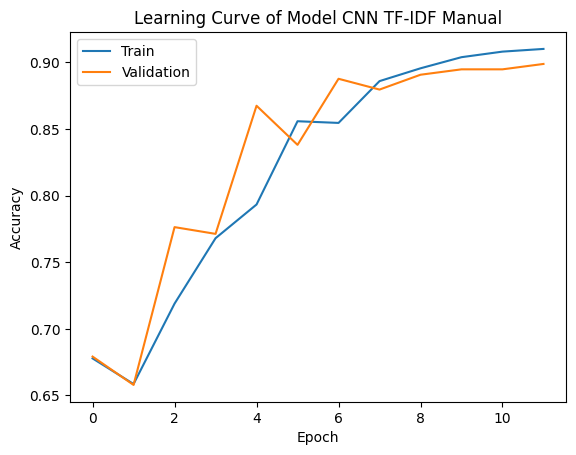

In [ ]:
plot_learning_curve(hist_model_nonbayes, 'CNN TF-IDF Manual')

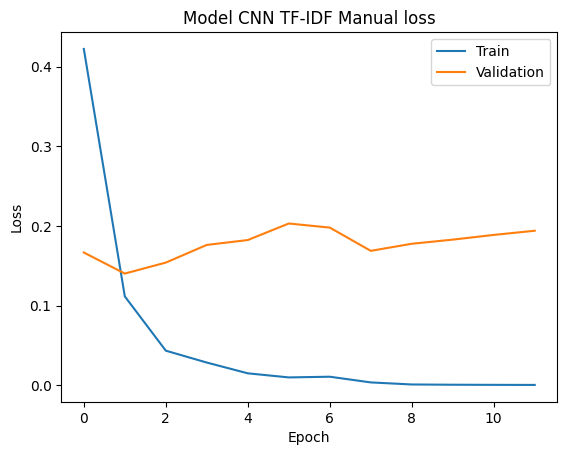

In [ ]:
plot_learning_loss(hist_model_nonbayes, 'CNN TF-IDF Manual')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


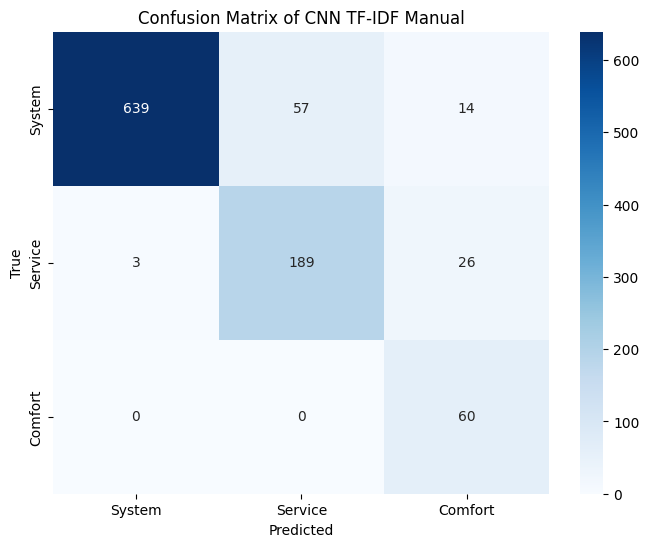

In [ ]:
plot_confusion_matrix_aspect(y_val, x_val_tfidf, Model_CNN_NonGlove, 'CNN TF-IDF Manual')

In [ ]:
from sklearn.metrics import classification_report
pred = Model_CNN_NonGlove.predict(x_val_tfidf, batch_size = 32)
pred = np.argmax(pred, axis=1)
y_test_1 = np.argmax(y_val, axis=1)
report = classification_report(y_test_1, pred, target_names=['system', 'service', 'comfort'])
print(report)

with open('classification_report_CNN TF-IDF Manual.txt', 'w') as f:
  f.write(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

      system       1.00      0.90      0.95       710
     service       0.77      0.87      0.81       218
     comfort       0.60      1.00      0.75        60

    accuracy                           0.90       988
   macro avg       0.79      0.92      0.84       988
weighted avg       0.92      0.90      0.90       988



In [ ]:
dir_now = '/content'
dir_tujuan = '/content/drive/My Drive/TA/exp_11_12/CNN-NONGLOVE-MANUAL/'
ext = ('.keras', '.png', '.txt')
for file in os.listdir(dir_now):
  if file.endswith(tuple(ext)):
    src_path = os.path.join(dir_now, file)
    if os.path.exists(src_path):
      shutil.copy(src_path, dir_tujuan)
    else:
      print(f"File not found: {src_path}")
  else:
    continue

File not found: /content/.config


In [ ]:
shutil.copy('/content/classification_report_CNN TF-IDF Manual.txt', '/content/drive/My Drive/TA/exp_11_12/CNN-NONGLOVE-MANUAL/')

'/content/drive/My Drive/TA/exp_11_12/CNN-NONGLOVE-MANUAL/classification_report_CNN TF-IDF Manual.txt'

#### Glove

In [ ]:
Model_CNN_Glove = Sequential()
Model_CNN_Glove.add(Embedding(input_dim=vocab_size_int, output_dim=300, weights=[embedding_matrix], trainable=False))
Model_CNN_Glove.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
Model_CNN_Glove.add(MaxPooling1D(pool_size=2))
Model_CNN_Glove.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
Model_CNN_Glove.add(MaxPooling1D(pool_size=2))
Model_CNN_Glove.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
Model_CNN_Glove.add(MaxPooling1D(pool_size=2))
Model_CNN_Glove.add(Flatten())
Model_CNN_Glove.add(Dense(units=128, activation='relu'))
Model_CNN_Glove.add(Dense(units=3, activation='sigmoid'))

Model_CNN_Glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Model_CNN_Glove.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       1,626,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,300 (6.20 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,626,300 (6.20 MB)

In [ ]:
hist_model_glove = Model_CNN_Glove.fit(x=x_train_int, y=y_train, validation_data=(x_val_int, y_val), epochs=35,
                   callbacks=allCallback('cnn_glove_manual.keras',
                                            patience=10))

Epoch 1/35
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6530 - loss: 0.5365
Epoch 1: val_loss improved from inf to 0.42516, saving model to cnn_glove_manual.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.6531 - loss: 0.5362 - val_accuracy: 0.5152 - val_loss: 0.4252 - learning_rate: 0.0010
Epoch 2/35
243/248 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6218 - loss: 0.3772
Epoch 2: val_loss improved from 0.42516 to 0.38769, saving model to cnn_glove_manual.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6214 - loss: 0.3770 - val_accuracy: 0.5688 - val_loss: 0.3877 - learning_rate: 0.0010
Epoch 3/35
246/248 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5889 - loss: 0.3259
Epoch 3: val_loss did not improve from 0.38769
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5889 - loss: 0.3259 - val_accuracy: 0.4960 - val_loss: 0.3921 - learning_rate: 0.0010
Epoch 4/35
245/248 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5973 - loss: 0.2882
Ep

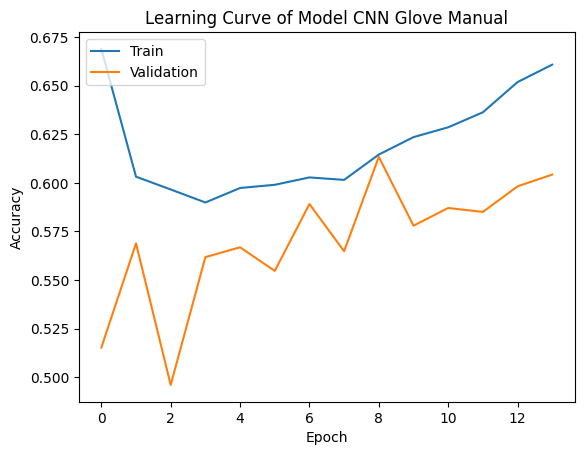

In [ ]:
plot_learning_curve(hist_model_glove, 'CNN Glove Manual')

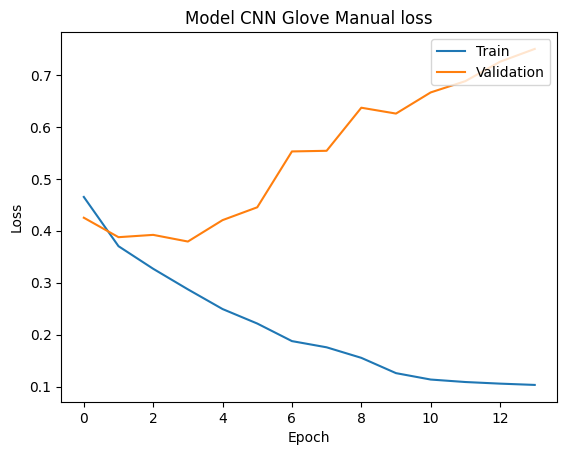

In [ ]:
plot_learning_loss(hist_model_glove, 'CNN Glove Manual')

In [ ]:
Model_CNN_Glove = tf.keras.models.load_model('/content/drive/My Drive/TA/exp_11_12/CNN-NONGLOVE-MANUAL/CNN_Glove_Manual.keras')

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


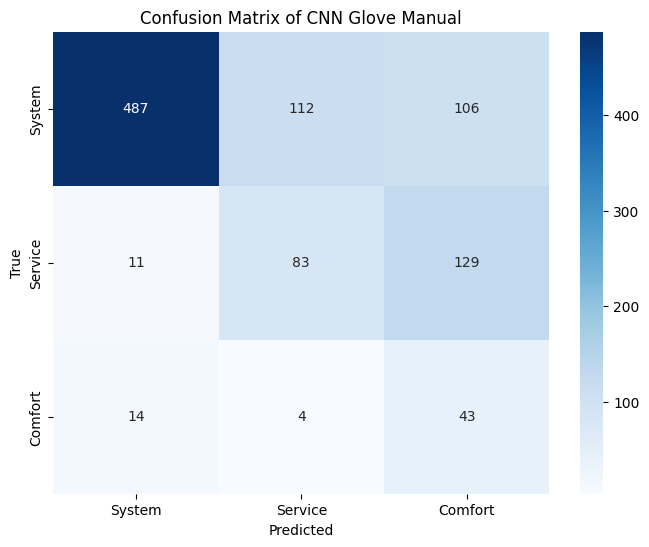

In [ ]:
plot_confusion_matrix_aspect(y_test, x_test_int, Model_CNN_Glove, 'CNN Glove Manual')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


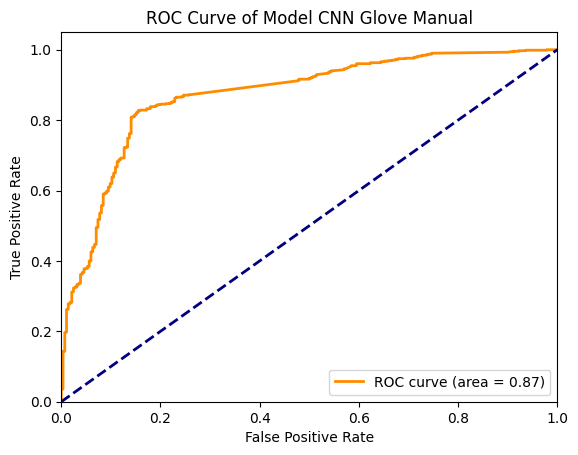

In [ ]:
plot_roc_auc_aspect(y_test, x_test_int, Model_CNN_Glove, 'CNN Glove Manual')

In [ ]:
plot_keras_model(Model_CNN_Glove, 'CNN Glove Manual')

In [ ]:
print(classification_report_aspect(x_test_int, y_test, Model_CNN_Glove, 'CNN Glove Manual'))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

      system       0.95      0.69      0.80       705
     service       0.42      0.37      0.39       223
     comfort       0.15      0.70      0.25        61

    accuracy                           0.62       989
   macro avg       0.51      0.59      0.48       989
weighted avg       0.78      0.62      0.67       989



In [ ]:
Model_CNN_Glove.save('CNN_Glove_Manual.keras')

In [ ]:
dir_now = '/content'
dir_tujuan = '/content/drive/My Drive/TA/exp_11_12/CNN-NONGLOVE-MANUAL/'
ext = ('.keras', '.png', '.txt')
for file in os.listdir(dir_now):
  if file.endswith(tuple(ext)):
    src_path = os.path.join(dir_now, file)
    if os.path.exists(src_path):
      shutil.copy(src_path, dir_tujuan)
    else:
      print(f"File not found: {src_path}")
  else:
    continue

### Hyperparameter Tuning

#### Non Glove

In [ ]:
class NonGloveHyperModel(keras_tuner.HyperModel):
    def build(self, hp, classes=3):
        model = Sequential()
        drop_rate = hp.Float("drop_rate", min_value=0.01, max_value=0.5, step=0.10)
        model.add(Embedding(input_dim=max_token, output_dim=300, trainable=True))
        for i in range(hp.Int('num_layers', min_value=2, max_value=4, step=1)):
          model.add(Conv1D(filters=hp.Int(name=f"filters_{i}", min_value=32, max_value=128, step=32),
                             kernel_size=hp.Int(name=f"kernel_{i}", min_value=3, max_value=5, step=2), strides=1,
                             padding='same', activation='relu'))
          if hp.Boolean("batch_norm"):
              model.add(BatchNormalization())
          model.add(MaxPooling1D(pool_size=1))
          if hp.Boolean('dropout'):
              model.add(Dropout(drop_rate))
        model.add(Flatten())
        for i in range(hp.Int('dense_layers', min_value=1, max_value=4, step=1)):
            model.add(Dense(units=hp.Int(name=f"units_{i}", min_value=32, max_value=128, step=32), activation='relu'))
            if hp.Boolean("batch_norm"):
                model.add(BatchNormalization())
            if hp.Boolean("dropout"):
                model.add(Dropout(drop_rate))
        model.add(Dense(3, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, hp, model,x,*args, **kwargs):
        return model.fit(x, *args, shuffle=hp.Boolean("shuffle"), **kwargs)

In [ ]:
class_=3
hp = HyperParameters()
hypermodel = NonGloveHyperModel()
cnn_hyperModel = hypermodel.build(hp, class_)
hypermodel.fit(hp, cnn_hyperModel,x=x_train_tfidf, y=y_train)
cnn_hyperModel.summary()

248/248 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.5083 - loss: 0.6159


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5420, 300)           │       3,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 5420, 32)            │          28,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5420, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5420, 32)            │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5420, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173440)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       5,550,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,746,443 (98.21 MB)

 Trainable params: 8,582,147 (32.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,164,296 (65.48 MB)

##### Hyperparameter Search: Bayesian Optimation

In [ ]:
tuner_bayes_non_glove = BayesianOptimization(
    hypermodel= NonGloveHyperModel(),
    objective = 'val_accuracy',
    max_trials= 15,
    overwrite=True,
    directory='/content/bayes_aspect_cosine/',
    project_name='bayes_aspect_cosine')

In [ ]:
tuner_bayes_non_glove.search(x=x_train_tfidf, y=y_train, epochs=10, validation_data=(x_val_tfidf, y_val), batch_size=32, callbacks=[TensorBoard("/tmp/tb_logs/bayes_aspect_cosine/")])

Trial 15 Complete [00h 06m 51s]
val_accuracy: 0.8238841891288757

Best val_accuracy So Far: 0.9517490863800049
Total elapsed time: 01h 44m 48s


In [ ]:
tuner_bayes_non_glove.results_summary()

Results summary
Results in /content/bayes_aspect_cosine/bayes_aspect_cosine
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
drop_rate: 0.21000000000000002
num_layers: 4
filters_0: 32
kernel_0: 5
batch_norm: False
dropout: True
filters_1: 128
kernel_1: 3
dense_layers: 4
units_0: 32
filters_2: 128
kernel_2: 3
units_1: 32
units_2: 64
shuffle: False
filters_3: 32
kernel_3: 3
units_3: 32
Score: 0.9517490863800049

Trial 09 summary
Hyperparameters:
drop_rate: 0.41000000000000003
num_layers: 3
filters_0: 32
kernel_0: 5
batch_norm: False
dropout: False
filters_1: 32
kernel_1: 5
dense_layers: 1
units_0: 32
filters_2: 128
kernel_2: 5
units_1: 32
units_2: 96
shuffle: True
filters_3: 128
kernel_3: 3
units_3: 64
Score: 0.9179734587669373

Trial 11 summary
Hyperparameters:
drop_rate: 0.21000000000000002
num_layers: 4
filters_0: 96
kernel_0: 5
batch_norm: False
dropout: False
filters_1: 96
kernel_1: 3
dense_layers: 2
units_0: 128
filters_2: 96

In [ ]:
best_hps_bayes_non_glove = tuner_bayes_non_glove.get_best_hyperparameters(3)

In [ ]:
best_hps_bayes_non_glove[2].values

{'drop_rate': 0.21000000000000002,
 'num_layers': 4,
 'filters_0': 96,
 'kernel_0': 5,
 'batch_norm': False,
 'dropout': False,
 'filters_1': 96,
 'kernel_1': 3,
 'dense_layers': 2,
 'units_0': 128,
 'filters_2': 96,
 'kernel_2': 3,
 'units_1': 128,
 'units_2': 32,
 'shuffle': True,
 'filters_3': 32,
 'kernel_3': 3,
 'units_3': 32}

reload

In [ ]:
tuner_bayes_non_glove = BayesianOptimization(
    hypermodel= NonGloveHyperModel(),
    objective = 'val_accuracy',
    max_trials= 15,
    overwrite=False,
    directory='/content/drive/My Drive/TA/exp_08_12/bayes_aspect_cosine/',
    project_name='bayes_aspect_cosine')

Reloading Tuner from /content/drive/My Drive/TA/exp_08_12/bayes_aspect_cosine/bayes_aspect_cosine/tuner0.json


In [ ]:
best_hps_bayes_non_glove = tuner_bayes_non_glove.get_best_hyperparameters(2)
best_hps_bayes_non_glove[0].values

{'drop_rate': 0.21000000000000002,
 'num_layers': 4,
 'filters_0': 32,
 'kernel_0': 5,
 'batch_norm': False,
 'dropout': True,
 'filters_1': 128,
 'kernel_1': 3,
 'dense_layers': 4,
 'units_0': 32,
 'filters_2': 128,
 'kernel_2': 3,
 'units_1': 32,
 'units_2': 64,
 'shuffle': False,
 'filters_3': 32,
 'kernel_3': 3,
 'units_3': 32}

##### Build Model & Training Model Hyper-1

In [ ]:
cnn_model_non_glove_1 = NonGloveHyperModel()
cnn_tune_non_glove_bayes_1 = cnn_model_non_glove_1.build(best_hps_bayes_non_glove[0])
cnn_tune_non_glove_bayes_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_hist_tune_hyper1 = cnn_tune_non_glove_bayes_1.fit(x=x_train_tfidf, y=y_train, validation_data=(x_val_tfidf, y_val), epochs=35,
                    callbacks=allCallback('cnn_model_bayes_ng_tfidf_hyper_1.keras',
                                            patience=10))

Epoch 1/35
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.6412 - loss: 0.6759
Epoch 1: val_loss improved from inf to 0.65384, saving model to cnn_model_bayes_ng_tfidf.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step - accuracy: 0.6414 - loss: 0.6759 - val_accuracy: 0.7186 - val_loss: 0.6538 - learning_rate: 0.0010
Epoch 2/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7172 - loss: 0.6554
Epoch 2: val_loss improved from 0.65384 to 0.43630, saving model to cnn_model_bayes_ng_tfidf.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.7172 - loss: 0.6553 - val_accuracy: 0.6427 - val_loss: 0.4363 - learning_rate: 0.0010
Epoch 3/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6704 - loss: 0.4177
Epoch 3: val_loss improved from 0.43630 to 0.12040, saving model to cnn_model_bayes_ng_tfidf.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 37s 151ms/step - accuracy: 0.6702 - loss: 0.4171 - val_accuracy: 0.6974 - val_loss: 0.1204 - learning_rate: 0.0010
Epoch 4/35


In [ ]:
plot_keras_model(cnn_tune_non_glove_bayes_1, 'CNN Non-Glove TF-IDF Post-Search Hyper-01')
cnn_tune_non_glove_bayes_1.save('cnn_model_bayes_non_glove_tfidf_hyper_01.keras')

##### Plot Learning & Loss Curve Hyper-01

In [ ]:
plot_keras_model(cnn_tune_non_glove_bayes_1, 'CNN Non-Glove TF-IDF Post-Search Hyper-01')
cnn_tune_non_glove_bayes_1.save('cnn_model_bayes_non_glove_tfidf_hyper_01.keras')

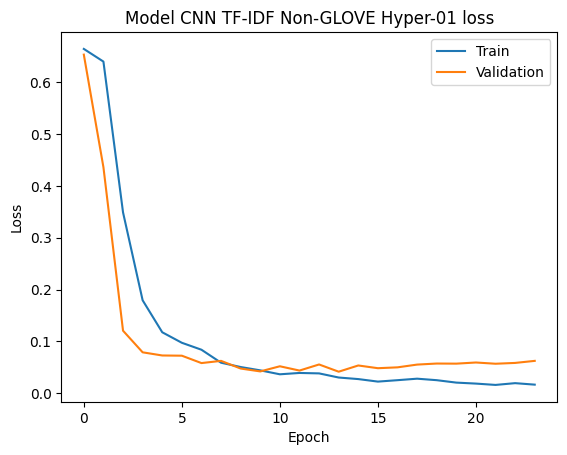

In [ ]:
plot_learning_loss(cnn_hist_tune_hyper1, 'CNN TF-IDF Non-GLOVE Hyper-01')

In [ ]:
pred = cnn_tune_non_glove_bayes_1.predict(x_test_tfidf, batch_size = 32)
pred = np.argmax(pred, axis=1)
y_test_copy = np.argmax(y_test, axis=1)
report = classification_report(y_test_copy, pred, target_names=['system', 'service', 'comfort'])
print(report)

with open('classification_report_CNN_TF-IDF_Non-GLOVE_Hyper-01.txt', 'w') as f:
  f.write(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

      system       1.00      0.86      0.92       705
     service       0.56      0.41      0.48       223
     comfort       0.28      1.00      0.43        61

    accuracy                           0.77       989
   macro avg       0.61      0.76      0.61       989
weighted avg       0.86      0.77      0.79       989



31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


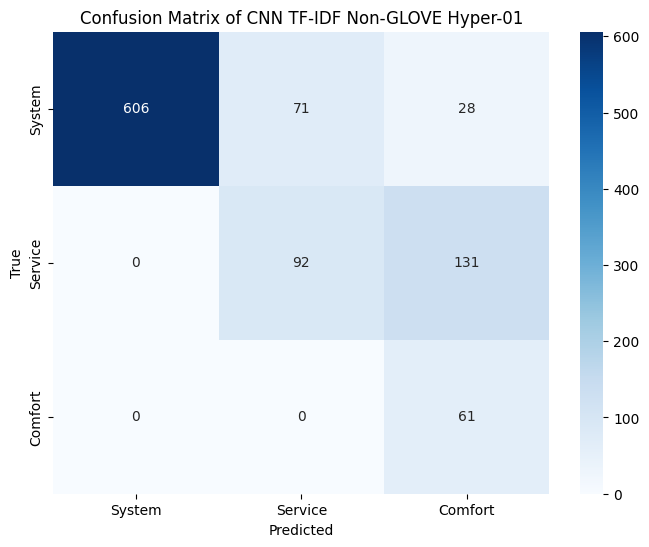

In [ ]:
plot_confusion_matrix_aspect(y_test, x_test_tfidf, cnn_tune_non_glove_bayes_1, 'CNN TF-IDF Non-GLOVE Hyper-01')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


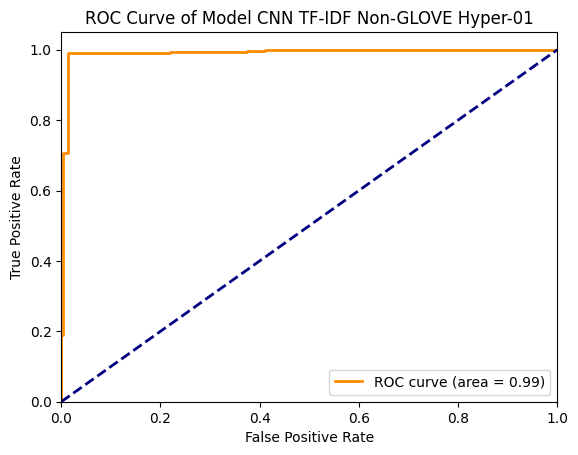

In [ ]:
plot_roc_auc_aspect(y_val, x_val_tfidf, cnn_tune_non_glove_bayes_1, 'CNN TF-IDF Non-GLOVE Hyper-01')

In [ ]:
best_hps_bayes_non_glove[1].values

{'drop_rate': 0.41000000000000003,
 'num_layers': 3,
 'filters_0': 32,
 'kernel_0': 5,
 'batch_norm': False,
 'dropout': False,
 'filters_1': 32,
 'kernel_1': 5,
 'dense_layers': 1,
 'units_0': 32,
 'filters_2': 128,
 'kernel_2': 5,
 'units_1': 32,
 'units_2': 96,
 'shuffle': True,
 'filters_3': 128,
 'kernel_3': 3,
 'units_3': 64}

##### Build Model & Training Model Hyper-2

In [ ]:
cnn_model_non_glove_2 = NonGloveHyperModel()
cnn_tune_non_glove_bayes_2 = cnn_model_non_glove_2.build(best_hps_bayes_non_glove[1])
cnn_tune_non_glove_bayes_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_hist_tune_hyper2 = cnn_tune_non_glove_bayes_2.fit(x=x_train_tfidf, y=y_train, validation_data=(x_val_tfidf, y_val), epochs=35,
                    callbacks=allCallback('cnn_model_bayes_ng_tfidf_hyper_2.keras',
                                            patience=10))

Epoch 1/35
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4336 - loss: 1.0734
Epoch 1: val_loss improved from inf to 0.67733, saving model to cnn_model_bayes_ng_tfidf_hyper_2.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 39s 159ms/step - accuracy: 0.4342 - loss: 1.0722 - val_accuracy: 0.7186 - val_loss: 0.6773 - learning_rate: 0.0010
Epoch 2/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7269 - loss: 0.6746
Epoch 2: val_loss improved from 0.67733 to 0.66547, saving model to cnn_model_bayes_ng_tfidf_hyper_2.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.7268 - loss: 0.6746 - val_accuracy: 0.7186 - val_loss: 0.6655 - learning_rate: 0.0010
Epoch 3/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7173 - loss: 0.6656
Epoch 3: val_loss improved from 0.66547 to 0.65843, saving model to cnn_model_bayes_ng_tfidf_hyper_2.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - accuracy: 0.7173 - loss: 0.6656 - val_accuracy: 0.7186 - val_loss: 0.6584 - learning_

In [ ]:
plot_keras_model(cnn_tune_non_glove_bayes_2, 'CNN Non-Glove TF-IDF Post-Search Hyper-02')
cnn_tune_non_glove_bayes_2.save('cnn_model_bayes_non_glove_tfidf_hyper_02.keras')

##### Plot Learning & Loss Curve Hyper-02

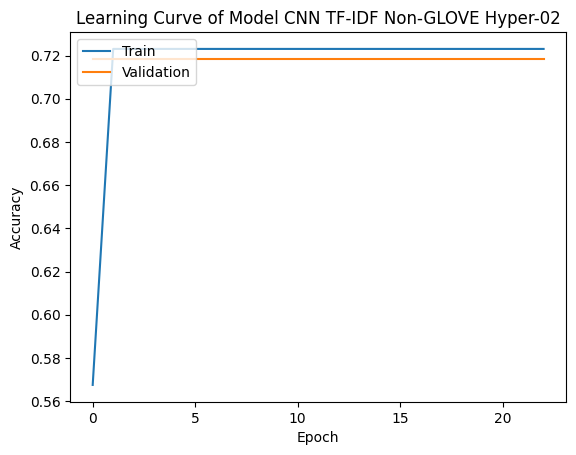

In [ ]:
plot_learning_curve(cnn_hist_tune_hyper2, 'CNN TF-IDF Non-GLOVE Hyper-02')

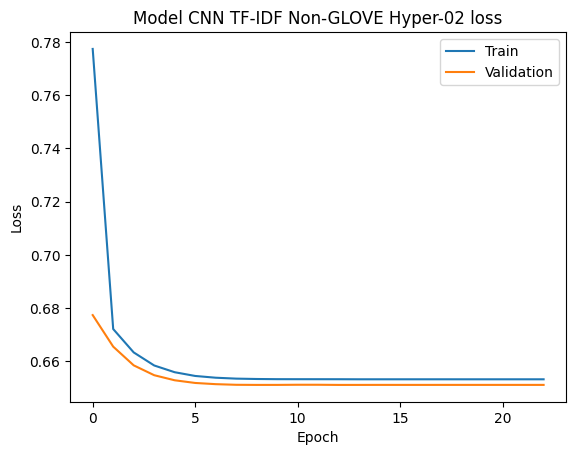

In [ ]:
plot_learning_loss(cnn_hist_tune_hyper2, 'CNN TF-IDF Non-GLOVE Hyper-02')

In [ ]:
pred = cnn_tune_non_glove_bayes_2.predict(x_test_tfidf, batch_size = 32)
pred = np.argmax(pred, axis=1)
y_test_copy = np.argmax(y_test, axis=1)
report = classification_report(y_test_copy, pred, target_names=['system', 'service', 'comfort'])
print(report)

with open('classification_report_CNN_TF-IDF_Non-GLOVE_Hyper-02.txt', 'w') as f:
  f.write(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

      system       0.71      1.00      0.83       705
     service       0.00      0.00      0.00       223
     comfort       0.00      0.00      0.00        61

    accuracy                           0.71       989
   macro avg       0.24      0.33      0.28       989
weighted avg       0.51      0.71      0.59       989



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


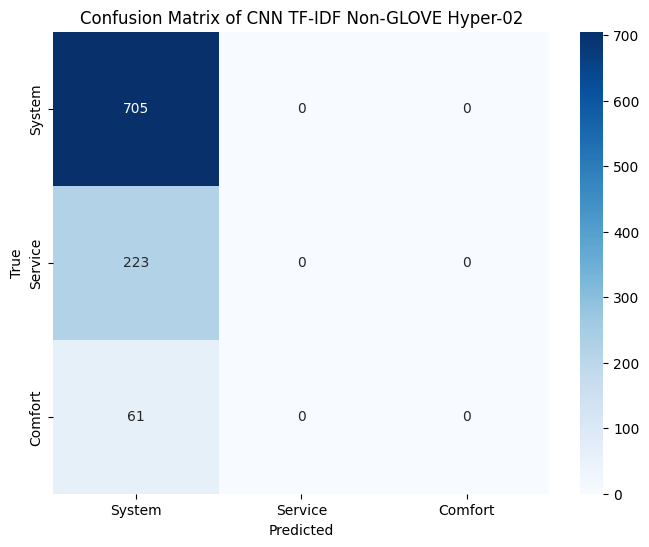

In [ ]:
plot_confusion_matrix_aspect(y_test, x_test_tfidf, cnn_tune_non_glove_bayes_2, 'CNN TF-IDF Non-GLOVE Hyper-02')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


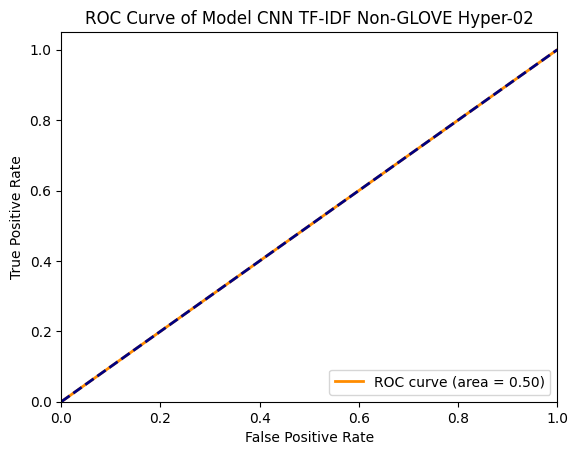

In [ ]:
plot_roc_auc_aspect(y_test, x_test_tfidf, cnn_tune_non_glove_bayes_2, 'CNN TF-IDF Non-GLOVE Hyper-02')

In [ ]:
!mkdir -p drive/MyDrive/TA/exp_08_12/cnn_non_glove

In [ ]:
import os
import shutil
dir_now = '/content'
dir_tujuan = '/content/drive/My Drive/TA/exp_08_12/cnn_non_glove/'
ext = ('.txt', '.keras', '.png')
for file in os.listdir(dir_now):
  if file.endswith(tuple(ext)):
    src_path = os.path.join(dir_now, file)
    if os.path.exists(src_path):
      shutil.copy(src_path, dir_tujuan)
    else:
      print(f"File not found: {src_path}")
  else:
    continue

##### Build Model & Training Model Hyper-3

In [ ]:
cnn_model_non_glove_3 = NonGloveHyperModel()
cnn_tune_non_glove_bayes_3 = cnn_model_non_glove_3.build(best_hps_bayes_non_glove[2])
cnn_tune_non_glove_bayes_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_hist_tune_hyper3 = cnn_tune_non_glove_bayes_3.fit(x=x_train_tfidf, y=y_train, validation_data=(x_val_tfidf, y_val), epochs=35,
                    callbacks=allCallback('cnn_model_bayes_ng_tfidf_hyper_3.keras',
                                            patience=10))

Epoch 1/35
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5891 - loss: 0.7179
Epoch 1: val_loss improved from inf to 0.46813, saving model to cnn_model_bayes_ng_tfidf_hyper_3.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 61s 188ms/step - accuracy: 0.5893 - loss: 0.7177 - val_accuracy: 0.3715 - val_loss: 0.4681 - learning_rate: 0.0010
Epoch 2/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.5895 - loss: 0.7965
Epoch 2: val_loss improved from 0.46813 to 0.37732, saving model to cnn_model_bayes_ng_tfidf_hyper_3.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.5898 - loss: 0.7951 - val_accuracy: 0.6032 - val_loss: 0.3773 - learning_rate: 0.0010
Epoch 3/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6251 - loss: 0.3908
Epoch 3: val_loss improved from 0.37732 to 0.36374, saving model to cnn_model_bayes_ng_tfidf_hyper_3.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 82s 169ms/step - accuracy: 0.6253 - loss: 0.3907 - val_accuracy: 0.6579 - val_loss: 0.3637 - learning_

In [ ]:
plot_keras_model(cnn_tune_non_glove_bayes_3, 'CNN Non-Glove TF-IDF Post-Search Hyper-03')
cnn_tune_non_glove_bayes_3.save('cnn_model_bayes_non_glove_tfidf_hyper_03.keras')

##### Plot Learning & Loss Curve Hyper-03

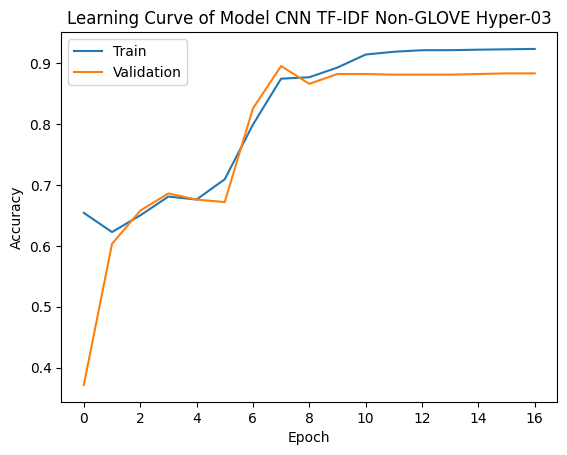

In [ ]:
plot_learning_curve(cnn_hist_tune_hyper3, 'CNN TF-IDF Non-GLOVE Hyper-03')

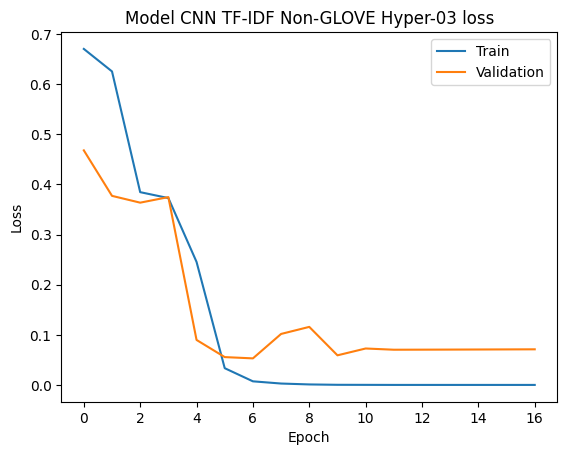

In [ ]:
plot_learning_loss(cnn_hist_tune_hyper3, 'CNN TF-IDF Non-GLOVE Hyper-03')

In [ ]:
pred = cnn_tune_non_glove_bayes_3.predict(x_test_tfidf, batch_size = 32)
pred = np.argmax(pred, axis=1)
y_test_copy = np.argmax(y_test, axis=1)
report = classification_report(y_test_copy, pred, target_names=['system', 'service', 'comfort'])
print(report)

with open('classification_report_CNN_TF-IDF_Non-GLOVE_Hyper-03.txt', 'w') as f:
  f.write(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
              precision    recall  f1-score   support

      system       1.00      0.89      0.94       705
     service       0.79      0.94      0.86       223
     comfort       0.61      1.00      0.76        61

    accuracy                           0.90       989
   macro avg       0.80      0.94      0.85       989
weighted avg       0.93      0.90      0.91       989



31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


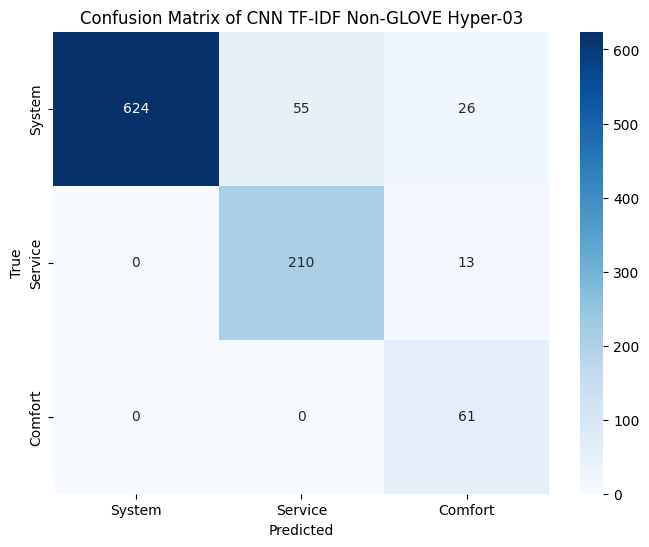

In [ ]:
plot_confusion_matrix_aspect(y_test, x_test_tfidf, cnn_tune_non_glove_bayes_3, 'CNN TF-IDF Non-GLOVE Hyper-03')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


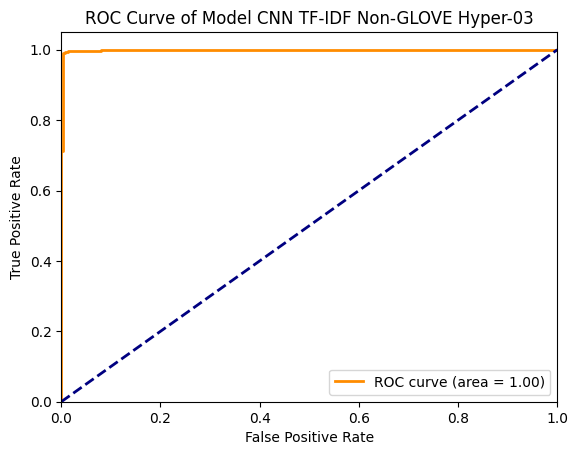

In [ ]:
plot_roc_auc_aspect(y_test, x_test_tfidf, cnn_tune_non_glove_bayes_3, 'CNN TF-IDF Non-GLOVE Hyper-03')

In [ ]:
!mkdir -p drive/MyDrive/TA/exp_08_12/cnn_non_glove

In [ ]:
import os
import shutil
dir_now = '/content'
dir_tujuan = '/content/drive/My Drive/TA/exp_08_12/cnn_non_glove/'
ext = ('.txt', '.keras', '.png')
for file in os.listdir(dir_now):
  if file.endswith(tuple(ext)):
    src_path = os.path.join(dir_now, file)
    if os.path.exists(src_path):
      shutil.copy(src_path, dir_tujuan)
    else:
      print(f"File not found: {src_path}")
  else:
    continue

In [ ]:
shutil.copy('/content/CNN Non-Glove TF-IDF Post-Search Hyper-03.png', dir_tujuan)
shutil.copy('/content/CNN Non-Glove TF-IDF Post-Search Hyper-02.png', dir_tujuan)

'/content/drive/My Drive/TA/exp_08_12/cnn_non_glove/CNN Non-Glove TF-IDF Post-Search Hyper-02.png'

In [ ]:
model_hyper3 = tf.keras.models.load_model('/content/drive/My Drive/TA/exp_08_12/cnn_non_glove/cnn_model_bayes_non_glove_tfidf_hyper_03.keras')

In [ ]:
model_hyper3.evaluate(x_test_tfidf, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9116 - loss: 0.0751


[0.061910178512334824, 0.9049544930458069]

#### Glove

##### BayesOptimizationSearch

In [ ]:
class GloveHyperModel(keras_tuner.HyperModel):
    def build(self, hp, classes=3):
        model = Sequential()
        drop_rate = hp.Float("drop_rate", min_value=0.01, max_value=0.5, step=0.10)
        model.add(Embedding(input_dim=vocab_size_int, output_dim=300, weights=[embedding_matrix], trainable=False))
        for i in range(hp.Int('num_layers', min_value=2, max_value=4, step=1)):
          model.add(Conv1D(filters=hp.Int(name=f"filters_{i}", min_value=16, max_value=128, step=16),
                             kernel_size=hp.Int(name=f"kernel_{i}", min_value=3, max_value=7, step=2), strides=1,
                             padding='same', activation='relu'))
          if hp.Boolean("batch_norm"):
              model.add(BatchNormalization())
          model.add(MaxPooling1D(pool_size=1))
          if hp.Boolean('dropout'):
              model.add(Dropout(drop_rate))
        model.add(Flatten())
        for i in range(hp.Int('dense_layers', min_value=1, max_value=4, step=1)):
            model.add(Dense(units=hp.Int(name=f"units_{i}", min_value=16, max_value=128, step=16), activation='relu'))
            if hp.Boolean("batch_norm"):
                model.add(BatchNormalization())
            if hp.Boolean("dropout"):
                model.add(Dropout(drop_rate))
        model.add(Dense(3, activation='sigmoid'))

        model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
        return model

    def fit(self, hp, model,x,*args, **kwargs):
        return model.fit(x, *args, shuffle=hp.Boolean("shuffle"), **kwargs)

In [ ]:
tuner_bayes = BayesianOptimization(
    hypermodel= GloveHyperModel(),
    objective = 'val_accuracy',
    max_trials= 10,
    overwrite=True,
    directory='/content/cnn_tuner_bayes_glove_cosine/',
    project_name='cnn_tuner_bayes_glove_cosine')

In [ ]:
tuner_bayes.search(x=x_train_int, y=y_train, epochs=10, validation_data=(x_val_int, y_val), batch_size=64, callbacks=[TensorBoard("/tmp/tb_logs/bayes_glove/")])

Trial 10 Complete [00h 00m 47s]
val_accuracy: 0.6204453706741333

Best val_accuracy So Far: 0.7176113128662109
Total elapsed time: 00h 09m 42s


In [ ]:
tuner_bayes.results_summary()

Results summary
Results in /content/cnn_tuner_bayes_glove_cosine/cnn_tuner_bayes_glove_cosine
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
drop_rate: 0.01
num_layers: 4
filters_0: 16
kernel_0: 7
batch_norm: False
dropout: True
filters_1: 16
kernel_1: 5
dense_layers: 2
units_0: 64
filters_2: 128
kernel_2: 3
units_1: 16
units_2: 128
shuffle: False
filters_3: 16
kernel_3: 3
Score: 0.7176113128662109

Trial 04 summary
Hyperparameters:
drop_rate: 0.21000000000000002
num_layers: 2
filters_0: 80
kernel_0: 7
batch_norm: False
dropout: True
filters_1: 128
kernel_1: 5
dense_layers: 4
units_0: 128
filters_2: 128
kernel_2: 7
units_1: 16
units_2: 128
shuffle: False
filters_3: 16
kernel_3: 7
units_3: 16
Score: 0.6659919023513794

Trial 02 summary
Hyperparameters:
drop_rate: 0.31000000000000005
num_layers: 4
filters_0: 64
kernel_0: 5
batch_norm: False
dropout: False
filters_1: 80
kernel_1: 7
dense_layers: 3
units_0: 32
filters_2: 96
kernel_

##### Train Model Bayes Optimazation

reload

In [ ]:
# tuner_bayes = BayesianOptimization(
#     hypermodel= GloveHyperModel(),
    # objective = 'val_accuracy',
#     max_trials= 10,
#     overwrite=False,
#     directory='/content/drive/MyDrive/TA/cosine_aspect_06_12',
#     project_name='cnn_tuner_bayes_glove_cosine')

Reloading Tuner from /content/drive/MyDrive/TA/cosine_aspect_06_12/cnn_tuner_bayes_glove_cosine/tuner0.json


In [ ]:
best_hps_bayes = tuner_bayes.get_best_hyperparameters(3)

In [ ]:
best_hps_bayes[1].values

{'drop_rate': 0.21000000000000002,
 'num_layers': 2,
 'filters_0': 80,
 'kernel_0': 7,
 'batch_norm': False,
 'dropout': True,
 'filters_1': 128,
 'kernel_1': 5,
 'dense_layers': 4,
 'units_0': 128,
 'filters_2': 128,
 'kernel_2': 7,
 'units_1': 16,
 'units_2': 128,
 'shuffle': False,
 'filters_3': 16,
 'kernel_3': 7,
 'units_3': 16}

In [ ]:
cnn_model = GloveHyperModel()
cnn_tune_model_bayes = cnn_model.build(best_hps_bayes[0])
cnn_tune_model_bayes.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │       1,626,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,300 (6.20 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,626,300 (6.20 MB)

In [ ]:
cnn_hist_tune = cnn_tune_model_bayes.fit(x=x_train_int, y=y_train, validation_data=(x_val_int, y_val), epochs=35,
                    callbacks=allCallback('cnn_glove_bayes_cosine.keras',
                                            patience=5))

Epoch 1/35
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7033 - loss: 0.5850
Epoch 1: val_loss improved from inf to 0.43053, saving model to cnn_glove_bayes_cosine.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7034 - loss: 0.5848 - val_accuracy: 0.6457 - val_loss: 0.4305 - learning_rate: 0.0010
Epoch 2/35
244/248 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6586 - loss: 0.4162
Epoch 2: val_loss improved from 0.43053 to 0.39730, saving model to cnn_glove_bayes_cosine.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6587 - loss: 0.4159 - val_accuracy: 0.6417 - val_loss: 0.3973 - learning_rate: 0.0010
Epoch 3/35
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6556 - loss: 0.3711
Epoch 3: val_loss improved from 0.39730 to 0.38952, saving model to cnn_glove_bayes_cosine.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6556 - loss: 0.3711 - val_accuracy: 0.6457 - val_loss: 0.3895 - learning_rate: 0.0010
Epoch 4/35
246/248 ━━━━━━

In [ ]:
plot_keras_model(cnn_tune_model_bayes, 'CNN Bayes Glove')

##### Plot Learning Curve

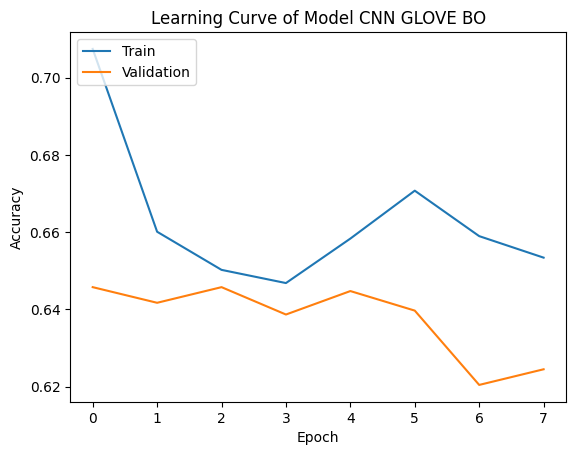

In [ ]:
plot_learning_curve(cnn_hist_tune, 'CNN GLOVE BO')

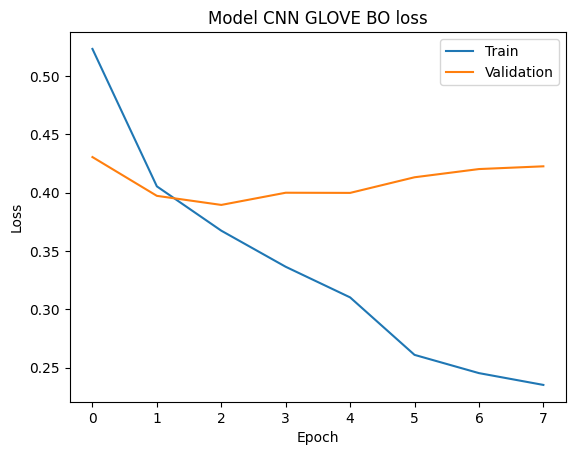

In [ ]:
plot_learning_loss(cnn_hist_tune, 'CNN GLOVE BO')

In [ ]:
pred = cnn_tune_model_bayes.predict(x_test_tfidf, batch_size = 32)
pred = np.argmax(pred, axis=1)
y_test_labels = y_test
y_test_labels = np.argmax(y_test_labels, axis=1)
print(y_test_labels.shape, pred.shape)
# print(y_test_labels[:5], pred[:5])
print(accuracy_score(y_test_labels, pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(989,) (989,)
0.3609706774519717


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


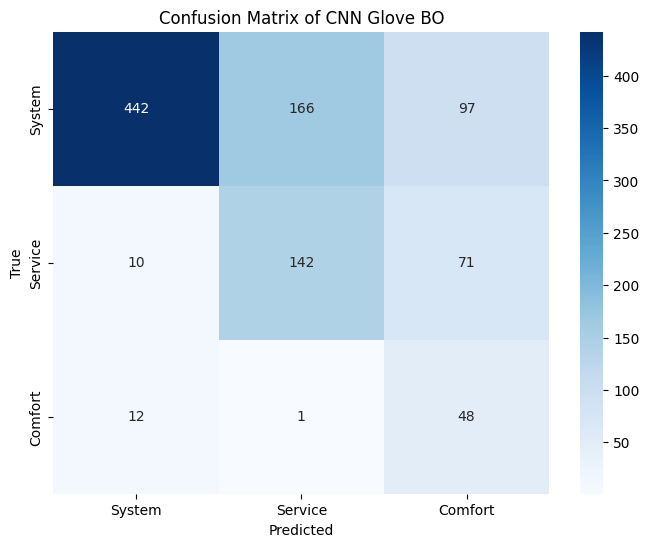

In [ ]:
plot_confusion_matrix_aspect(y_test, x_test_int, cnn_tune_model_bayes, 'CNN Glove BO')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


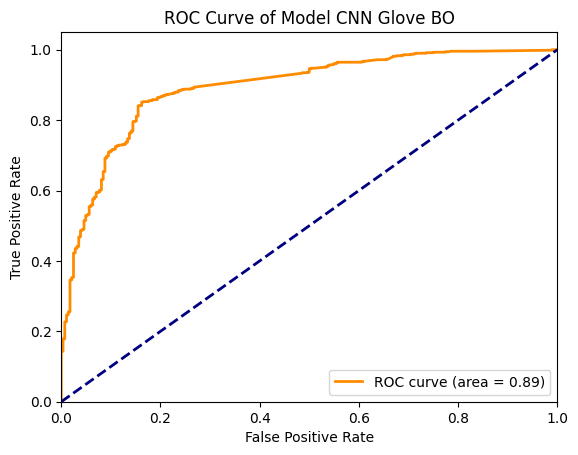

In [ ]:
plot_roc_auc_aspect(y_test, x_test_int, cnn_tune_model_bayes, 'CNN Glove BO')

In [ ]:
from sklearn.metrics import classification_report
pred = cnn_tune_model_bayes.predict(x_test_int, batch_size = 32)
pred = np.argmax(pred, axis=1)
y_test_1 = np.argmax(y_test, axis=1)
report = classification_report(y_test_1, pred, target_names=['system', 'service', 'comfort'])
print(report)

with open('classification_report_CNN_Glove_Bayes.txt', 'w') as f:
  f.write(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

      system       0.95      0.63      0.76       705
     service       0.46      0.64      0.53       223
     comfort       0.22      0.79      0.35        61

    accuracy                           0.64       989
   macro avg       0.54      0.68      0.55       989
weighted avg       0.80      0.64      0.68       989



In [ ]:
save_log_search('/content/cnn_tuner_bayes_glove_cosine/', '/content/drive/MyDrive/TA/exp_08_12/')

Error copying directory: [Errno 1] Operation not permitted


In [ ]:
!mkdir -p drive/MyDrive/TA/exp_08_12/cnn_BO_Glove_16_12

In [ ]:
file_list =[
    '/content/CNN Bayes Glove.png',
    '/content/classification_report_CNN_Glove_Bayes.txt',
    '/content/cnn_glove_bayes_cosine.keras',
    '/content/confusion_matrix_CNN Glove BO_aspect_cosine.png',
    '/content/learning_curve_CNN GLOVE BO.png',
    '/content/loss_curve_CNN GLOVE BO.png',
    '/content/roc_auc_curve_CNN Glove BO.png'
]
dir_tujuan = '/content/drive/My Drive/TA/exp_08_12/cnn_BO_Glove_16_12/'
for file in file_list:
  shutil.copy(file, dir_tujuan)

In [ ]:
import os
import shutil
dir_now = '/content'
dir_tujuan = '/content/drive/My Drive/TA/exp_08_12/cnn_BO_Glove_16_12/'
ext = ('.txt', '.keras', '.png')
for file in os.listdir(dir_now):
  if file.endswith(tuple(ext)):
    src_path = os.path.join(dir_now, file)
    if os.path.exists(src_path):
      shutil.copy(src_path, dir_tujuan)
    else:
      print(f"File not found: {src_path}")
  else:
    continue

## Load Model CNN

In [ ]:
CNN_manual = tf.keras.models.load_model('/content/drive/My Drive/TA/exp_11_12/CNN-NONGLOVE-MANUAL/CNN_TF-IDF_Manual.keras')
CNN_BO = tf.keras.models.load_model('/content/drive/My Drive/TA/exp_08_12/cnn_non_glove/cnn_model_bayes_ng_tfidf_hyper_3.keras')
CNN_glove_manual = tf.keras.models.load_model('/content/drive/My Drive/TA/exp_11_12/CNN-NONGLOVE-MANUAL/CNN_Glove_Manual.keras')
CNN_glove_BO = tf.keras.models.load_model('/content/drive/My Drive/TA/exp_08_12/cnn_BO_Glove_16_12/cnn_glove_bayes_cosine.keras')
models = {
    'CNN Manul' : CNN_manual,
    'CNN Bayes Optimization': CNN_BO,
}
models_glove = {
    'CNN Glove Manual' : CNN_glove_manual,
    'CNN Glove Bayes Optimization':CNN_glove_BO
}

In [ ]:
x_test_tfidf.shape

TensorShape([989, 5420])

In [ ]:
CNN_manual.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5420, 300)           │       1,626,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 5420, 128)           │         115,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2710, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2710, 128)           │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1355, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1355, 128)           │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 677, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,092,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,797,115 (148.00 MB)

 Trainable params: 12,932,371 (49.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,864,744 (98.67 MB)

In [ ]:
CNN_BO.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 5420, 300)           │       3,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 5420, 96)            │         144,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 5420, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 5420, 96)            │          27,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 5420, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 5420, 96)            │          27,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 5420, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 5420, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 5420, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 173440)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      22,200,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,278,539 (290.98 MB)

 Trainable params: 25,426,179 (96.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,852,360 (193.99 MB)

In [ ]:
CNN_glove_manual.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 300)            │       1,626,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 498, 128)            │         115,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 249, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 247, 128)            │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 123, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 121, 128)            │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7680)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         983,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,218,631 (19.91 MB)

 Trainable params: 1,197,443 (4.57 MB)

 Non-trainable params: 1,626,300 (6.20 MB)

 Optimizer params: 2,394,888 (9.14 MB)

In [ ]:
CNN_manual.evaluate(x_test_tfidf, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.8946 - loss: 0.1756


[0.21075013279914856, 0.8948432803153992]

In [ ]:
CNN_BO.evaluate(x_test_tfidf, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.8484 - loss: 0.0529


[0.050031878054142, 0.8402426838874817]

In [ ]:
CNN_glove_manual.evaluate(x_test_int, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6222 - loss: 0.7881


[0.7647115588188171, 0.6198179721832275]

In [ ]:
CNN_glove_BO.evaluate(x_test_int, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6838 - loss: 0.3799


[0.3828336298465729, 0.6683518886566162]

In [ ]:
def plot_multiple_roc_curve(y_test, X_test, models):
  for model_name, model in models.items():
      y_pred=model.predict(X_test) # predict the test data
  # Compute False postive rate, and True positive rate
      fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
  # Calculate Area under the curve to display on the plot
      auc = roc_auc_score(y_test,model.predict(X_test))
  # Now, plot the computed values
      plt.plot(fpr, tpr, label='%s AUC (area = %0.4f)' % (model_name, auc))
  # Custom settings for the plot
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1-Specificity(False Positive Rate)')
  plt.ylabel('Sensitivity(True Positive Rate)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.savefig('roc_curve_plot.png', transparent=True, dpi=1200, format='png',)
  plt.show()   # Display

In [ ]:
def plot_roc_auc_aspect(y_true, x_test, model, model_name):
  y_pred = model.predict(x_test, batch_size = 32)
  y_pred_probs =  np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1, keepdims=True)
  classes = [0, 1, 2]
  y_true_bin = label_binarize(np.argmax(y_true.values, axis=1), classes=classes)
  n_classes = y_true_bin.shape[1]
  roc_auc_score(y_true_bin, y_pred_probs, multi_class='ovo', average='macro')
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_probs.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Plot ROC curves for each class and the micro-average
  plt.figure()
  lw = 2
  for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
          lw=lw, label=f'ROC curve of class {i} (area = %0.4f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve of Model {model_name}')
  plt.legend(loc="lower right")
  plt.savefig(f'roc_auc_curve_{model_name}.png', transparent=True, dpi=1200, format='png',)
  plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step


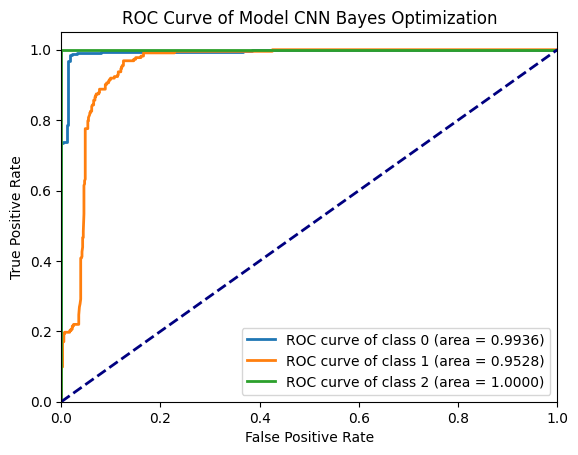

In [ ]:
plot_roc_auc_aspect(y_test, x_test_tfidf, CNN_BO, 'CNN Bayes Optimization')

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


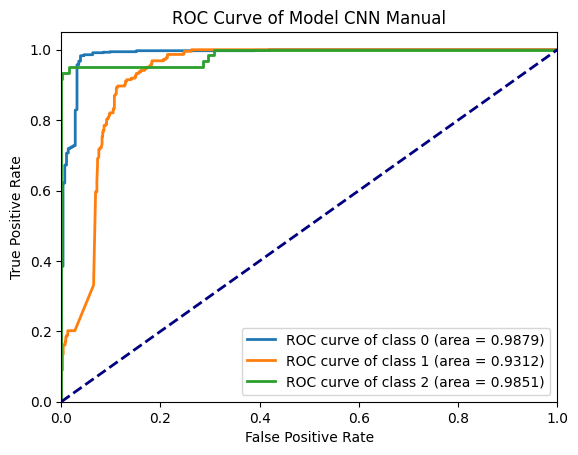

In [ ]:
plot_roc_auc_aspect(y_test, x_test_tfidf, CNN_manual, 'CNN Manual')

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


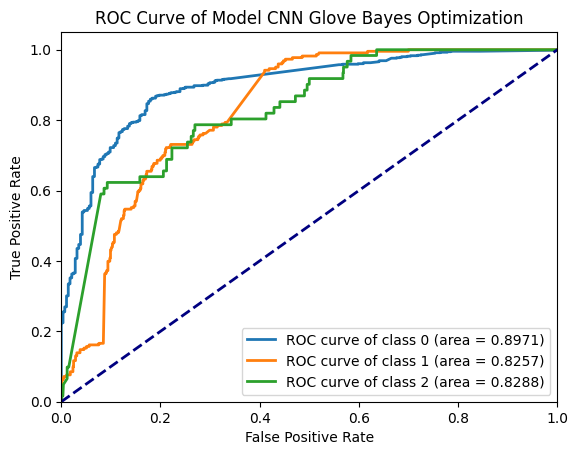

In [ ]:
plot_roc_auc_aspect(y_test, x_test_int, CNN_glove_BO, 'CNN Glove Bayes Optimization')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


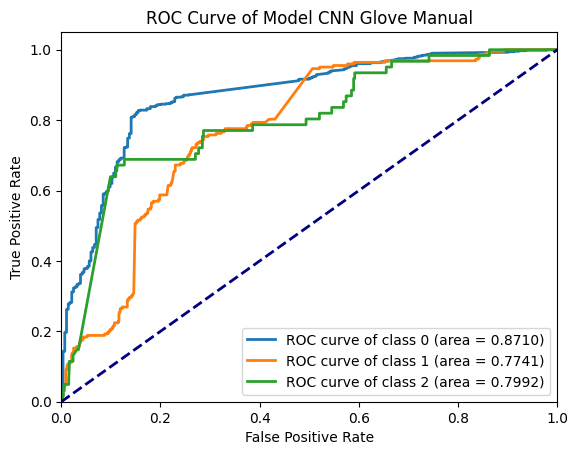

In [ ]:
plot_roc_auc_aspect(y_test, x_test_int, CNN_glove_manual, 'CNN Glove Manual')

# Klasifikasi Sentimen

In [ ]:
!pip install imbalanced-learn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import learning_curve

In [ ]:
df = pd.read_csv('/content/drive/My Drive/TA/review_brimo_22_24_sample_label_aspect_cosine_sentiment_byscore.csv')
df.head()

,index,content,score,at,appVersion,month,year,cleanText,lowerText,fix_typo,tokenText,filterText,text,stemmingText,category,scores,system,service,comfort,sentiment_by_score
0,13521,Saya baru buat rekening kemarin trus download ...,2,2022-07-13 08:41:51,2.23.1,7,2022,Saya baru buat rekening kemarin trus download ...,saya baru buat rekening kemarin trus download ...,saya baru buat rekening kemarin trus download ...,"['saya', 'baru', 'buat', 'rekening', 'kemarin'...","['rekening', 'kemarin', 'trus', 'download', 'a...",rekening kemarin trus download ap pas isi data...,rekening kemarin trus download ap pas isi data...,system,"{'system': 0.012142765644722657, 'service': 0....",1.0,1.0,1.0,0
1,82877,"Kenapa selalu gagal pas kirim rekaman vidio, p...",2,2022-06-08 08:39:56,2.21.0,6,2022,Kenapa selalu gagal pas kirim rekaman vidio pa...,kenapa selalu gagal pas kirim rekaman vidio pa...,kenapa selalu gagal pas kirim rekaman vidio pa...,"['kenapa', 'selalu', 'gagal', 'pas', 'kirim', ...","['gagal', 'pas', 'kirim', 'rekaman', 'vidio', ...",gagal pas kirim rekaman vidio jaringanya bagus,gagal pas kirim rekam vidio jaringanya bagus,system,"{'system': 0.00583988885114533, 'service': 0.0...",1.0,0.0,0.0,0
2,19381,"Susah banget daftar brimonya, pas perekam vidi...",2,2022-07-11 18:16:16,2.23.1,7,2022,Susah banget daftar brimonya pas perekam vidio...,susah banget daftar brimonya pas perekam vidio...,susah banget daftar brimonya pas perekam vidio...,"['susah', 'banget', 'daftar', 'brimonya', 'pas...","['susah', 'banget', 'daftar', 'brimonya', 'pas...",susah banget daftar brimonya pas perekam vidio...,susah banget daftar brimonya pas rekam vidio k...,system,"{'system': 0.022140101947715395, 'service': 0....",1.0,0.0,1.0,0
3,115783,Kalo bisa diprint lebih mantap lagi brimo..,3,2022-11-01 12:28:52,2.30.0,11,2022,Kalo bisa diprint lebih mantap lagi brimo,kalo bisa diprint lebih mantap lagi brimo,kalo bisa diprint lebih mantap lagi brimo,"['kalo', 'bisa', 'diprint', 'lebih', 'mantap',...","['kalo', 'diprint', 'mantap', 'brimo']",kalo diprint mantap brimo,kalo diprint mantap brimo,system,"{'system': 0.003469194610882888, 'service': 0....",1.0,0.0,0.0,0
4,7725,"Susah bgt buat bikin akun mbanking, sering ter...",1,2022-06-08 11:48:16,2.21.0,6,2022,Susah bgt buat bikin akun mbanking sering terj...,susah bgt buat bikin akun mbanking sering terj...,susah bgt buat bikin akun mbanking sering terj...,"['susah', 'bgt', 'buat', 'bikin', 'akun', 'mba...","['susah', 'bgt', 'bikin', 'akun', 'mbanking', ...",susah bgt bikin akun mbanking error vertifikas...,susah bgt bikin akun mbanking error vertifikas...,system,"{'system': 0.00968073144232891, 'service': 0.0...",1.0,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               8887 non-null   int64  
 1   content             8887 non-null   object 
 2   score               8887 non-null   int64  
 3   at                  8887 non-null   object 
 4   appVersion          8887 non-null   object 
 5   month               8887 non-null   int64  
 6   year                8887 non-null   int64  
 7   cleanText           8887 non-null   object 
 8   lowerText           8887 non-null   object 
 9   fix_typo            8887 non-null   object 
 10  tokenText           8887 non-null   object 
 11  filterText          8887 non-null   object 
 12  text                8883 non-null   object 
 13  stemmingText        8883 non-null   object 
 14  category            8289 non-null   object 
 15  scores              8289 non-null   object 
 16  system

In [ ]:
df.isnull().sum()

,0
index,0
content,0
score,0
at,0
appVersion,0
month,0
year,0
cleanText,0
lowerText,0
fix_typo,0


In [ ]:
df_new = df[['stemmingText', 'sentiment_by_score']].dropna(subset=['stemmingText'])
df_new.head()

,stemmingText,sentiment_by_score
0,rekening kemarin trus download ap pas isi data...,0
1,gagal pas kirim rekam vidio jaringanya bagus,0
2,susah banget daftar brimonya pas rekam vidio k...,0
3,kalo diprint mantap brimo,0
4,susah bgt bikin akun mbanking error vertifikas...,0


<Axes: xlabel='sentiment_by_score'>

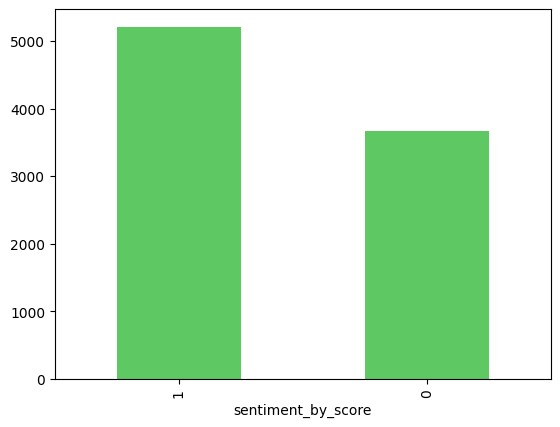

In [ ]:
df_new['sentiment_by_score'].value_counts().plot(kind='bar', color='#5ec962')

In [ ]:
df_new.count()

,0
stemmingText,8883
sentiment_by_score,8883


## Function Utils SVM

In [ ]:
def print_metrics(y_test, X_test, model, model_name):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision_svm = precision_score(y_test, y_pred)
  recall_svm = recall_score(y_test, y_pred)
  f1_score_svm = f1_score(y_test, y_pred)
  print(f"Accuracy of {model_name}:", accuracy)
  print(f"Precision of {model_name}:", precision_svm)
  print(f"Recall of {model_name}:", recall_svm)
  print(f"F1 Score of {model_name}:", f1_score_svm)
  with open(f'{model_name}_all_metrics.txt', 'w') as f:
    f.write(f"Accuracy of {model_name}: {accuracy}\n")
    f.write(f"Precision of {model_name}: {precision_svm}\n")
    f.write(f"Recall of {model_name}: {recall_svm}\n")
    f.write(f"F1 Score of {model_name}: {f1_score_svm}\n")

def plot_confusion_matrix(y_test, X_test, model, model_name):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  plt.title(f'Confusion Matrix {model_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.savefig(f'confusion_matrix_{model_name}.png', transparent=True, dpi=1200, format='png',)
  plt.show()

def roc_curve_plot(model, model_name, y_test, X_test):
  y_pred = model.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test,  y_pred)
  auc = roc_auc_score(y_test, y_pred)

  plt.plot(fpr,tpr,color='darkorange', lw=2, label="AUC="+str(auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.title(f'ROC Curve of {model_name}')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.savefig(f'roc_curve_plot_{model_name}.png', transparent=True, dpi=1200, format='png',)
  plt.show()

def save_classification_report(y_test, X_test, model, model_name):
  y_pred = model.predict(X_test)
  report = classification_report(y_test, y_pred, output_dict=True)
  df_temp = pd.DataFrame(report).transpose()
  with open(f'{model_name}_classification_report.txt', 'w') as f:
    f.write(str(df_temp))

def save_model(model, model_name):
  filename = f'{model_name}.sav'
  pickle.dump(model, open(filename, 'wb'))

def load_model(file_path):
  filename = f'{file_path}.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  return loaded_model

In [ ]:
def plot_learning_curve_model(X, y, model, cv=5, model_name='SVM'):
  train_sizes, train_scores, test_scores = learning_curve(
      estimator=model,
      X=X,
      y=y,
      train_sizes=np.linspace(0.1, 1.0, 10),
      cv=cv,
      scoring='accuracy',
      n_jobs=-1
  )

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.plot(train_sizes, train_mean, label='Training score')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
  plt.plot(train_sizes, test_mean, label='Cross-validation score')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

  plt.xlabel('Training examples')
  plt.ylabel('Score')
  plt.title(f'Learning Curve {model_name}')
  plt.legend(loc="best")
  plt.grid()
  plt.savefig(f'learning_curve_{model_name}.png', transparent=True, dpi=1200, format='png')
  plt.show()

## Split Dataset

## TF-IDF

In [ ]:
X, y = df_new['stemmingText'], df_new['sentiment_by_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Jumlah Data Train:", (len(X_train), len(y_train)))
print("Jumlah Data Test:", (len(X_test), len(y_test)))

Jumlah Data Train: (7106, 7106)
Jumlah Data Test: (1777, 1777)


In [ ]:
def transform_data(X_train, X_test):
  vectorizer = TfidfVectorizer()
  X_train = vectorizer.fit_transform(X_train)
  X_test = vectorizer.transform(X_test)
  return X_train, X_test, vectorizer

In [ ]:
X_tfidf, X_test_tfidf, vectorizer = transform_data(X_train, X_test)

In [ ]:
with open('vectorizer.pkl', 'wb') as f:
  pickle.dump(vectorizer, f)

with open('tfidf-train.txt', 'wb') as f:
  pickle.dump(X_tfidf, f)

with open('tfidf-test.txt', 'wb') as f:
  pickle.dump(X_test_tfidf, f)

## Modeling SVM

<hr>

### SVM

Create new dataset

In [ ]:
X_train_SVM, X_test_SVM, vectorizer = transform_data(X_train, X_test)

Modeling SVM

In [ ]:
model_svc = SVC(C=0.2, kernel='linear', random_state=123)
model_svc.fit(X_train_SVM, y_train)

SVC(C=0.2, kernel='linear', random_state=123)

In [ ]:
plot_learning_curve_model(X_train_tfidf, y_train, model_svc, 5, 'SVM')

Testing with data test

In [ ]:
print_metrics(y_test, X_test_SVM, model_svc, 'SVM')

Accuracy of SVM: 0.8925154755205402
Precision of SVM: 0.9447340980187695
Recall of SVM: 0.867816091954023
F1 Score of SVM: 0.9046430354468298


Save model

In [ ]:
save_model(model_svc, 'SVM')

<hr>

### OverSampling: SMOTE

Create new dataset and resampling data

In [ ]:
X_train_smote, X_test_smote, _ = transform_data(X_train, X_test)

In [ ]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train_smote, y_train)

In [ ]:
print("Jumlah Data Train Sebelum SMOTE:", (Counter(y_train)))
print("Jumlah Data Sesudah SMOTE:", (Counter(y_train_smote)))

Jumlah Data Train Sebelum SMOTE: Counter({1: 4168, 0: 2938})
Jumlah Data Sesudah SMOTE: Counter({1: 4168, 0: 4168})


Modeling SVM

In [ ]:
model_smote = SVC(C=0.2, kernel='linear', random_state=123)
model_smote.fit(X_train_smote, y_train_smote)

SVC(C=0.2, kernel='linear', random_state=123)

In [ ]:
plot_learning_curve_model(X_train_smote, y_train_smote, model_smote, 5, 'SVM SMOTE')

Testing with data test

In [ ]:
print_metrics(y_test, X_test_smote, model_smote, 'SVM_SMOTE')

Accuracy of svc_smote: 0.8919527293190771
Precision of svc_smote: 0.9722838137472284
Recall of svc_smote: 0.8400383141762452
F1 Score of svc_smote: 0.9013360739979445


In [ ]:
save_model(model_smote, 'SVM_SMOTE')

<hr>

### Oversampling: RandomOverSampling

Create new dataset and resampling data

In [ ]:
X_train_ros, X_test_ros, _ = transform_data(X_train, X_test)

In [ ]:
overSample = RandomOverSampler(sampling_strategy='minority')
X_train_ros, y_train_ros = overSample.fit_resample(X_train_ros, y_train)

In [ ]:
print("Jumlah Data Train Sebelum Random Oversampling:", (Counter(y_train)))
print("Jumlah Data Sesudah Random Oversampling:", (Counter(y_train_ros)))

Jumlah Data Train Sebelum Random Oversampling: Counter({1: 4168, 0: 2938})
Jumlah Data Sesudah Random Oversampling: Counter({1: 4168, 0: 4168})


Modeling SVM

In [ ]:
model_ros = SVC(C=0.2, kernel='linear', random_state=123)
model_ros.fit(X_train_ros, y_train_ros)

SVC(C=0.2, kernel='linear', random_state=123)

In [ ]:
plot_learning_curve_model(X_train_ros, y_train_ros, model_ros, 5, 'SVM Random OverSampling')

Testing with data test

In [ ]:
print_metrics(y_test, X_test_ros, model_ros, 'SVM_RandomOverSampling')

Accuracy of SVM_RandomOverSampling: 0.887450759707372
Precision of SVM_RandomOverSampling: 0.9647577092511013
Recall of SVM_RandomOverSampling: 0.8390804597701149
F1 Score of SVM_RandomOverSampling: 0.8975409836065574


Save model

In [ ]:
save_model(model_ros, 'SVM_RandomOverSampling')

<hr>

### RandomUnderSampling

Create new dataset and resampling data

In [ ]:
X_train_rus, X_test_rus, _ = transform_data(X_train, X_test)

In [ ]:
underSample = RandomUnderSampler(sampling_strategy='majority')
X_train_rus, y_train_rus = underSample.fit_resample(X_train_rus, y_train)

In [ ]:
print("Jumlah Data Train Sebelum Random Undersampling:", (Counter(y_train)))
print("Jumlah Data Sesudah Random Undersampling:", (Counter(y_train_rus)))

Jumlah Data Train Sebelum Random Undersampling: Counter({1: 4168, 0: 2938})
Jumlah Data Sesudah Random Undersampling: Counter({0: 2938, 1: 2938})


Modeling SVM

In [ ]:
model_rus = SVC(C=0.2, kernel='linear', random_state=123)
model_rus.fit(X_train_rus, y_train_rus)

SVC(C=0.2, kernel='linear', random_state=123)

In [ ]:
plot_learning_curve_model(X_train_rus, y_train_rus, model_rus, 5, 'SVM Random UnderSampling')

Testing with data test

In [ ]:
print_metrics(y_test, X_test_rus, model_rus, 'SVM_RandomUnderSampling')

Accuracy of SVM_RandomUnderSampling: 0.8885762521102982
Precision of SVM_RandomUnderSampling: 0.9763513513513513
Recall of SVM_RandomUnderSampling: 0.8304597701149425
F1 Score of SVM_RandomUnderSampling: 0.8975155279503105


Save model

In [ ]:
save_model(model_rus, 'SVM_RandomUnderSampling')

## Classification Report

In [ ]:
classification_report_svm = classification_report(y_test, model_svc.predict(X_test_SVM))
save_classification_report(y_test, X_test_SVM, model_svc, 'SVM')
print("Classification Report of SVM:")
print(classification_report_svm)

Classification Report of SVM:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       733
           1       0.94      0.87      0.90      1044

    accuracy                           0.89      1777
   macro avg       0.89      0.90      0.89      1777
weighted avg       0.90      0.89      0.89      1777



In [ ]:
y_pred_smote = model_smote.predict(X_test_smote)
classification_report_svm_smote = classification_report(y_test, y_pred_smote)
save_classification_report(y_test, X_test_smote, model_smote, 'SVM_SMOTE')
print("Classification Report of SVM_SMOTE:")
print(classification_report_svm_smote)

Classification Report of SVM_SMOTE:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       733
           1       0.97      0.84      0.90      1044

    accuracy                           0.89      1777
   macro avg       0.89      0.90      0.89      1777
weighted avg       0.90      0.89      0.89      1777



In [ ]:
y_pred_ros = model_ros.predict(X_test_ros)
classification_report_svm_roc = classification_report(y_test, y_pred_ros)
save_classification_report(y_test, X_test_ros, model_ros, 'SVM_RandomOverSampling')
print("Classification Report of SVM_RandomOverSampling:")
print(classification_report_svm_roc)

Classification Report of SVM_RandomOverSampling:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       733
           1       0.96      0.84      0.90      1044

    accuracy                           0.89      1777
   macro avg       0.89      0.90      0.89      1777
weighted avg       0.90      0.89      0.89      1777



In [ ]:
y_pred_rus = model_rus.predict(X_test_rus)
classification_report_svm_rus = classification_report(y_test, y_pred_rus)
save_classification_report(y_test, X_test_rus, model_rus, 'SVM_RandomUnderSampling')
print("Classification Report of SVM_RandomUnderSampling:")
print(classification_report_svm_rus)

Classification Report of SVM_RandomUnderSampling:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       733
           1       0.98      0.83      0.90      1044

    accuracy                           0.89      1777
   macro avg       0.89      0.90      0.89      1777
weighted avg       0.90      0.89      0.89      1777



## Confusion Matrix SVM

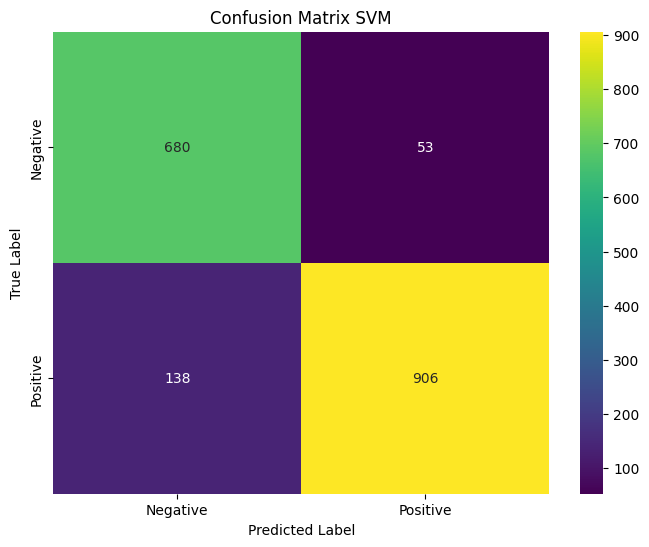

In [ ]:
plot_confusion_matrix(y_test, X_test_SVM, model_svc, 'SVM')

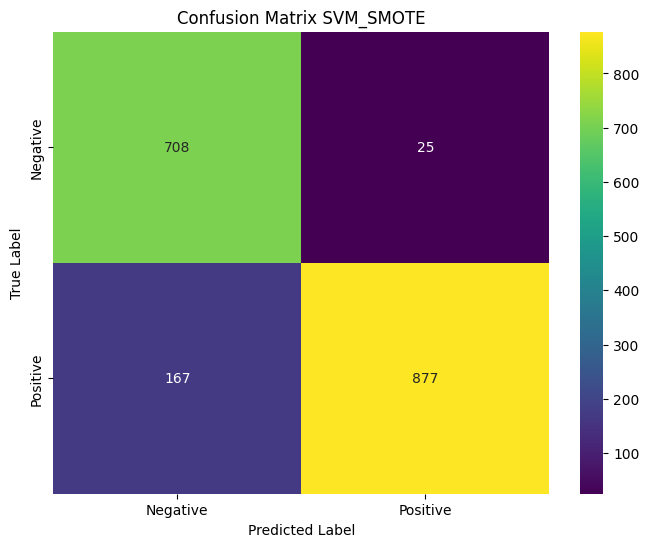

In [ ]:
plot_confusion_matrix(y_test, X_test_smote, model_smote, 'SVM_SMOTE')

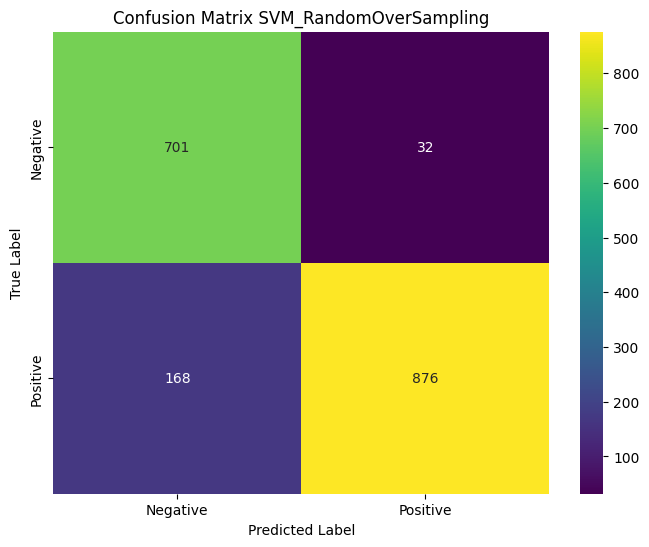

In [ ]:
plot_confusion_matrix(y_test, X_test_ros, model_ros, 'SVM_RandomOverSampling')

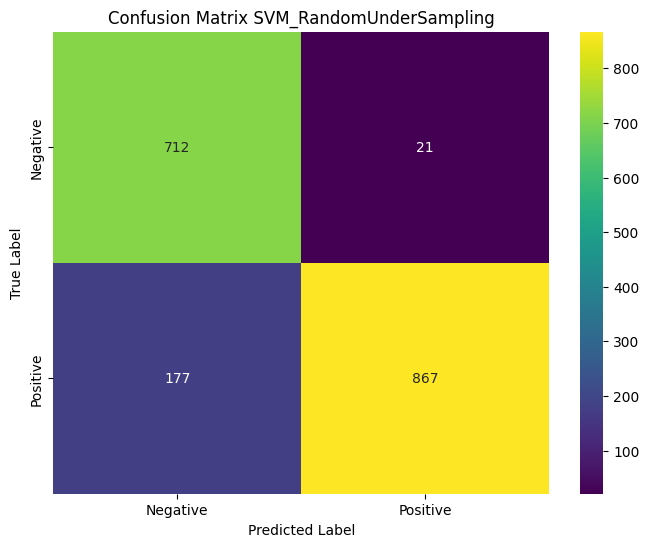

In [ ]:
plot_confusion_matrix(y_test, X_test_rus, model_rus, 'SVM_RandomUnderSampling')

## ROC-CURVE

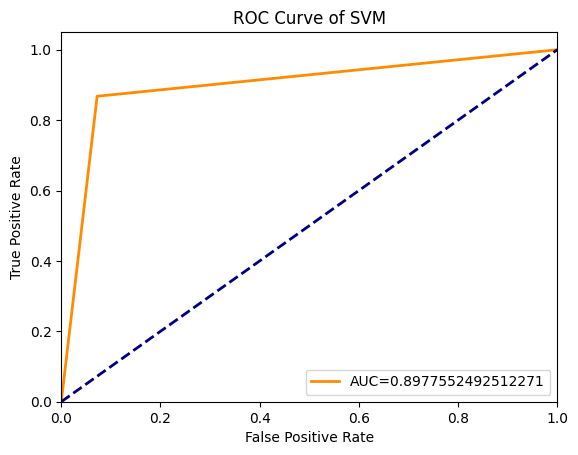

In [ ]:
roc_curve_plot(model_svc, 'SVM', y_test, X_test_SVM)

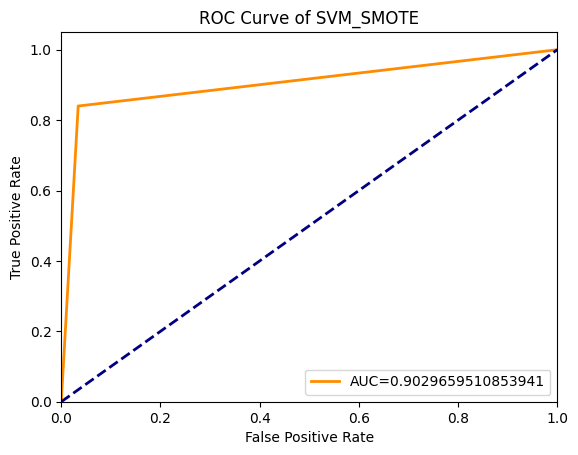

In [ ]:
roc_curve_plot(model_smote, 'SVM_SMOTE', y_test, X_test_smote)

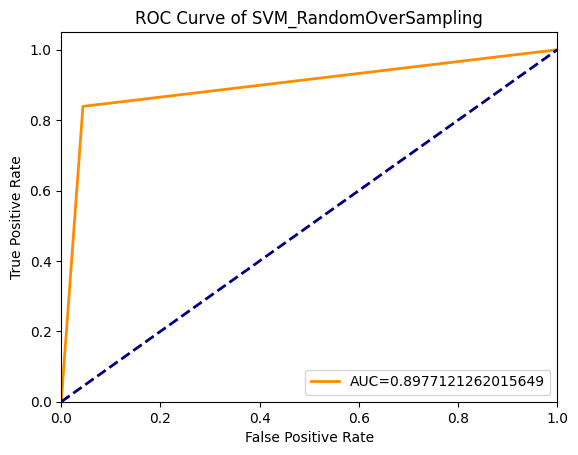

In [ ]:
roc_curve_plot(model_ros, 'SVM_RandomOverSampling', y_test, X_test_ros)

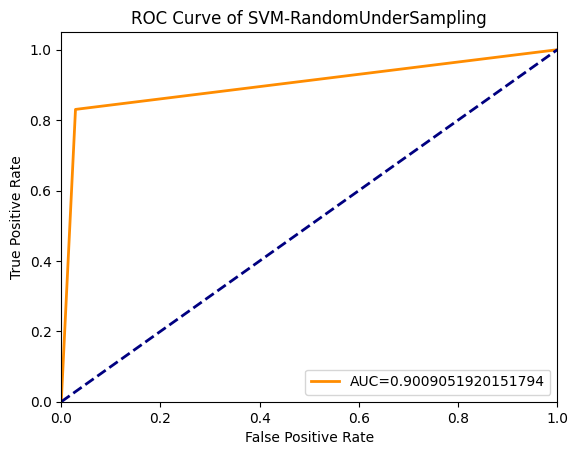

In [ ]:
roc_curve_plot(model_rus, 'SVM-RandomUnderSampling', y_test, X_test_SVM)

## Save Model SVM Result To Drive

In [ ]:
!ls

confusion_matrix_SVM.png		      drive		      tfidf-train.txt
confusion_matrix_SVM_RandomOverSampling.png   roc_curve_plot_SVM.png  vectorizer.pkl
confusion_matrix_SVM_RandomUnderSampling.png  sample_data
confusion_matrix_SVM_SMOTE.png		      tfidf-test.txt


In [ ]:
import os
import shutil
dir_now = '/content'
dir_tujuan = '/content/drive/My Drive/TA/exp_08_12/svm_file/'
ext = ('.txt', '.sav', '.png', 'pkl')
for file in os.listdir(dir_now):
  if file.endswith(tuple(ext)):
    src_path = os.path.join(dir_now, file)
    if os.path.exists(src_path):
      shutil.copy(src_path, dir_tujuan)
    else:
      print(f"File not found: {src_path}")
  else:
    continue

<hr>

## Load Model

In [ ]:
main_dir = '/content/drive/My Drive/TA/exp_08_12/svm_file/'
model_svc = load_model(f'{main_dir}SVM')
model_smote = load_model(f'{main_dir}SVM_SMOTE')
model_ros = load_model(f'{main_dir}SVM_RandomOverSampling')
model_rus = load_model(f'{main_dir}SVM_RandomUnderSampling')

In [ ]:
accuracy_ = accuracy_score(y_test, model_svc.predict(X_test_SVM))
print("Accuracy SVM:",accuracy_)

Accuracy SVM: 0.8925154755205402


In [ ]:
accuracy_ = accuracy_score(y_test, model_smote.predict(X_test_SVM))
print('Accuracy SVM-SMOTE:',accuracy_)

Accuracy SVM-SMOTE: 0.8919527293190771


In [ ]:
accuracy_ = accuracy_score(y_test, model_ros.predict(X_test_SVM))
print('Accuracy SVM-RandomOverSamplin:',accuracy_)

Accuracy SVM-RandomOverSamplin: 0.887450759707372


In [ ]:
accuracy_ = accuracy_score(y_test, model_rus.predict(X_test_SVM))
print('Accuracy SVM-RandomUnderSampling:',accuracy_)

Accuracy SVM-RandomUnderSampling: 0.8885762521102982


<hr>

## Start Labeling Non Label Data

In [ ]:
df[['pred_svm', 'pred_smote', 'pred_ros', 'pred_rus']] = ''

In [ ]:
X_new = df['content']
X_new = vectorizer.transform(X_new)

In [ ]:
df['pred_svm'] = model_svc.predict(X_new)
df['pred_smote'] = model_smote.predict(X_new)
df['pred_ros'] = model_ros.predict(X_new)
df['pred_rus'] = model_rus.predict(X_new)

In [ ]:
df.head()

,content,system,service,comfort,sentiment,pred_svm,pred_smote,pred_ros,pred_rus
0,pelayanannyaaa sangat muas,0,1,1,1.0,1.0,1.0,1.0,1.0
1,sangat mudahahah untuk guna dalam transaksi el...,0,1,1,1.0,1.0,1.0,1.0,1.0
2,aplikasi teribuuruk yang pernah ada sangat sus...,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0
3,aplikasi yang sangat bantu dalam transaksi dan...,1,1,1,1.0,1.0,1.0,1.0,1.0
4,sungguh bantu,0,1,1,1.0,1.0,1.0,1.0,1.0


In [ ]:
df['major_pred'] = df[['pred_svm', 'pred_smote', 'pred_ros', 'pred_rus']].mode(axis=1)[0]

In [ ]:
df.head()

,content,system,service,comfort,sentiment,pred_svm,pred_smote,pred_ros,pred_rus,major_pred
0,pelayanannyaaa sangat muas,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,sangat mudahahah untuk guna dalam transaksi el...,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0
2,aplikasi teribuuruk yang pernah ada sangat sus...,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,aplikasi yang sangat bantu dalam transaksi dan...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
4,sungguh bantu,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.to_csv('final_result_svm_pred.csv')

# Demo

tunjukin code,

List procedure demo
*   
*   

